In [39]:
import os

import matplotlib.pyplot as plt
import numpy as np

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from autoencoder import Autoencoder
from solver import train_vali_all_epochs, dev_train_vali_all_epochs, test

In [40]:
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

train_size = int(len(mnist_train) * 0.8)
validation_size = len(mnist_train) - train_size
mnist_train, mnist_val = torch.utils.data.random_split(mnist_train, [train_size, validation_size])

batch_size = 128
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=6)
validation_loader = DataLoader(mnist_val, batch_size=batch_size, shuffle=False, num_workers=6)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=6)

In [41]:
save_path = os.getenv("HOME") + '/sparsify_models/non_linear_models/'

In [42]:
def train_sae(save_path):
    sae_model = Autoencoder(n_input=784, n_hidden_ls=[512, 128, 32], n_layers=3)
    sae_optimizer = torch.optim.SGD(sae_model.parameters(), lr=0.1, momentum=0.9)

    sae_train_loss, sae_validation_loss = train_vali_all_epochs(
        sae_model, 
        train_loader, 
        validation_loader, 
        sae_optimizer, 
        n_epochs=50, 
        device=torch.device('cuda'), 
        save_path=save_path+'SAE/'
        )
    
    return sae_model, sae_train_loss, sae_validation_loss

In [43]:
def train_dae(save_path):
    dae_model = Autoencoder(n_input=784, n_hidden_ls=[512, 128, 32], n_layers=3)
    dae_optimizer = torch.optim.SGD(dae_model.parameters(), lr=0.1, momentum=0.9)

    size_ls = [4, 4, 4, 4, 4, 10,
            10, 10, 10, 10, 16, 16,
            16, 16, 16, 16, 16, 24,
            24, 24, 24, 24, 24, 24, 
            32, 32, 32, 32, 32, 32,
            32, 32, 32, 32, 32, 32, 
            32, 32, 32, 32, 32, 32, 
            32, 32, 32, 32, 32, 32, 
            32, 32]

    manner = 'cell_division'

    dae_train_loss, dae_validation_loss = dev_train_vali_all_epochs(
        dae_model, 
        size_ls,
        manner,
        train_loader,
        validation_loader, 
        dae_optimizer, 
        n_epochs=50,
        device=torch.device('cpu'), 
        save_path=save_path+'DAE/'
        )
    
    return dae_model, dae_train_loss, dae_validation_loss

In [44]:
for i in range(10):
    save_path = os.getenv("HOME") + f'/sparsify_models/non_linear_models/{i}/'
    
    train_sae(save_path)
    train_dae(save_path)

Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000403: 100%|██████████| 375/375 [00:01<00:00, 191.36it/s]

====> Epoch: 0 Average loss: 0.0645



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0520
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000317: 100%|██████████| 375/375 [00:02<00:00, 171.01it/s]


====> Epoch: 1 Average loss: 0.0451
====> Test set loss: 0.0399
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000267: 100%|██████████| 375/375 [00:02<00:00, 167.24it/s]


====> Epoch: 2 Average loss: 0.0373
====> Test set loss: 0.0351
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000241: 100%|██████████| 375/375 [00:02<00:00, 166.56it/s]


====> Epoch: 3 Average loss: 0.0336
====> Test set loss: 0.0319
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000241: 100%|██████████| 375/375 [00:02<00:00, 147.97it/s]


====> Epoch: 4 Average loss: 0.0306
====> Test set loss: 0.0292
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000217: 100%|██████████| 375/375 [00:02<00:00, 149.60it/s]

====> Epoch: 5 Average loss: 0.0282


====> Test set loss: 0.0271
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000200: 100%|██████████| 375/375 [00:02<00:00, 144.45it/s]

====> Epoch: 6 Average loss: 0.0265


====> Test set loss: 0.0256
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000193: 100%|██████████| 375/375 [00:02<00:00, 158.39it/s]

====> Epoch: 7 Average loss: 0.0252


====> Test set loss: 0.0245
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000185: 100%|██████████| 375/375 [00:02<00:00, 166.02it/s]

====> Epoch: 8 Average loss: 0.0242


====> Test set loss: 0.0236
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000189: 100%|██████████| 375/375 [00:02<00:00, 170.28it/s]

====> Epoch: 9 Average loss: 0.0234


====> Test set loss: 0.0230
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000187: 100%|██████████| 375/375 [00:02<00:00, 175.59it/s]


====> Epoch: 10 Average loss: 0.0228
====> Test set loss: 0.0224
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000171: 100%|██████████| 375/375 [00:02<00:00, 172.86it/s]


====> Epoch: 11 Average loss: 0.0222
====> Test set loss: 0.0218
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000172: 100%|██████████| 375/375 [00:02<00:00, 167.24it/s]

====> Epoch: 12 Average loss: 0.0217


====> Test set loss: 0.0213
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000163: 100%|██████████| 375/375 [00:02<00:00, 170.72it/s]

====> Epoch: 13 Average loss: 0.0212


====> Test set loss: 0.0208
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000172: 100%|██████████| 375/375 [00:02<00:00, 169.56it/s]


====> Epoch: 14 Average loss: 0.0206
====> Test set loss: 0.0203
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000159: 100%|██████████| 375/375 [00:02<00:00, 166.49it/s]

====> Epoch: 15 Average loss: 0.0202


====> Test set loss: 0.0199
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000152: 100%|██████████| 375/375 [00:02<00:00, 168.08it/s]

====> Epoch: 16 Average loss: 0.0198


====> Test set loss: 0.0195
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000152: 100%|██████████| 375/375 [00:02<00:00, 169.51it/s]

====> Epoch: 17 Average loss: 0.0194


====> Test set loss: 0.0192
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000147: 100%|██████████| 375/375 [00:02<00:00, 168.15it/s]


====> Epoch: 18 Average loss: 0.0192
====> Test set loss: 0.0189
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000155: 100%|██████████| 375/375 [00:02<00:00, 175.28it/s]


====> Epoch: 19 Average loss: 0.0189
====> Test set loss: 0.0187
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000151: 100%|██████████| 375/375 [00:02<00:00, 164.24it/s]


====> Epoch: 20 Average loss: 0.0186
====> Test set loss: 0.0184
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000144: 100%|██████████| 375/375 [00:02<00:00, 167.94it/s]


====> Epoch: 21 Average loss: 0.0184
====> Test set loss: 0.0182
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000149: 100%|██████████| 375/375 [00:02<00:00, 166.67it/s]

====> Epoch: 22 Average loss: 0.0181


====> Test set loss: 0.0180
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000129: 100%|██████████| 375/375 [00:02<00:00, 168.64it/s]

====> Epoch: 23 Average loss: 0.0180


====> Test set loss: 0.0178
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000143: 100%|██████████| 375/375 [00:02<00:00, 174.25it/s]


====> Epoch: 24 Average loss: 0.0178
====> Test set loss: 0.0177
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:02<00:00, 165.77it/s]


====> Epoch: 25 Average loss: 0.0177
====> Test set loss: 0.0176
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:02<00:00, 171.48it/s]


====> Epoch: 26 Average loss: 0.0176
====> Test set loss: 0.0175
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000129: 100%|██████████| 375/375 [00:02<00:00, 173.79it/s]


====> Epoch: 27 Average loss: 0.0176
====> Test set loss: 0.0175
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000142: 100%|██████████| 375/375 [00:02<00:00, 170.17it/s]


====> Epoch: 28 Average loss: 0.0176
====> Test set loss: 0.0175
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:02<00:00, 176.45it/s]

====> Epoch: 29 Average loss: 0.0175


====> Test set loss: 0.0175
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000142: 100%|██████████| 375/375 [00:02<00:00, 184.60it/s]

====> Epoch: 30 Average loss: 0.0175


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:02<00:00, 186.09it/s]


====> Epoch: 31 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000131: 100%|██████████| 375/375 [00:02<00:00, 185.64it/s]

====> Epoch: 32 Average loss: 0.0175


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:01<00:00, 188.59it/s]


====> Epoch: 33 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000140: 100%|██████████| 375/375 [00:02<00:00, 187.42it/s]

====> Epoch: 34 Average loss: 0.0175


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000128: 100%|██████████| 375/375 [00:01<00:00, 187.97it/s]


====> Epoch: 35 Average loss: 0.0174
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:02<00:00, 184.92it/s]


====> Epoch: 36 Average loss: 0.0174
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:02<00:00, 183.32it/s]

====> Epoch: 37 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 187.85it/s]

====> Epoch: 38 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:02<00:00, 182.72it/s]


====> Epoch: 39 Average loss: 0.0174
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:01<00:00, 189.06it/s]

====> Epoch: 40 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000131: 100%|██████████| 375/375 [00:02<00:00, 186.72it/s]


====> Epoch: 41 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000132: 100%|██████████| 375/375 [00:02<00:00, 186.71it/s]


====> Epoch: 42 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:02<00:00, 184.11it/s]


====> Epoch: 43 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:02<00:00, 184.63it/s]

====> Epoch: 44 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000141: 100%|██████████| 375/375 [00:02<00:00, 184.25it/s]


====> Epoch: 45 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000148: 100%|██████████| 375/375 [00:02<00:00, 186.52it/s]

====> Epoch: 46 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000146: 100%|██████████| 375/375 [00:02<00:00, 168.65it/s]


====> Epoch: 47 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:02<00:00, 184.67it/s]

====> Epoch: 48 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:02<00:00, 186.39it/s]


====> Epoch: 49 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.
All train losses saved.
Directory created: /home/david/sparsify_models/non_linear_models/0/DAE/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000963: 100%|██████████| 375/375 [00:03<00:00, 99.64it/s] 

====> Epoch: 0 Average loss: 0.1220


====> Test set loss: 0.1223
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:184: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(save_path + 'model_weights_epoch

====> Epoch: 1 Average loss: 0.0647


====> Test set loss: 0.0551
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000365: 100%|██████████| 375/375 [00:04<00:00, 90.18it/s]


====> Epoch: 2 Average loss: 0.0506
====> Test set loss: 0.0489
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000380: 100%|██████████| 375/375 [00:04<00:00, 88.35it/s]

====> Epoch: 3 Average loss: 0.0487


====> Test set loss: 0.0486
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000366: 100%|██████████| 375/375 [00:04<00:00, 87.21it/s]


====> Epoch: 4 Average loss: 0.0486
====> Test set loss: 0.0486
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000393: 100%|██████████| 375/375 [00:04<00:00, 89.33it/s]

====> Epoch: 5 Average loss: 0.0490


====> Test set loss: 0.0486
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000364: 100%|██████████| 375/375 [00:04<00:00, 88.85it/s]


====> Epoch: 6 Average loss: 0.0484
====> Test set loss: 0.0480
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000338: 100%|██████████| 375/375 [00:04<00:00, 89.68it/s]

====> Epoch: 7 Average loss: 0.0459


====> Test set loss: 0.0444
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000336: 100%|██████████| 375/375 [00:04<00:00, 88.78it/s]

====> Epoch: 8 Average loss: 0.0431


====> Test set loss: 0.0423
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000338: 100%|██████████| 375/375 [00:04<00:00, 86.00it/s]

====> Epoch: 9 Average loss: 0.0422


====> Test set loss: 0.0421
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000334: 100%|██████████| 375/375 [00:04<00:00, 86.21it/s]

====> Epoch: 10 Average loss: 0.0420


====> Test set loss: 0.0418
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000318: 100%|██████████| 375/375 [00:04<00:00, 93.12it/s] 

====> Epoch: 11 Average loss: 0.0410


====> Test set loss: 0.0400
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000305: 100%|██████████| 375/375 [00:03<00:00, 94.40it/s]


====> Epoch: 12 Average loss: 0.0394
====> Test set loss: 0.0383
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000282: 100%|██████████| 375/375 [00:04<00:00, 82.10it/s]

====> Epoch: 13 Average loss: 0.0372


====> Test set loss: 0.0357
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000268: 100%|██████████| 375/375 [00:04<00:00, 87.75it/s]

====> Epoch: 14 Average loss: 0.0346


====> Test set loss: 0.0335
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000256: 100%|██████████| 375/375 [00:04<00:00, 86.42it/s]

====> Epoch: 15 Average loss: 0.0332


====> Test set loss: 0.0326
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000250: 100%|██████████| 375/375 [00:04<00:00, 86.03it/s]

====> Epoch: 16 Average loss: 0.0325


====> Test set loss: 0.0321
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000241: 100%|██████████| 375/375 [00:04<00:00, 83.32it/s]


====> Epoch: 17 Average loss: 0.0322
====> Test set loss: 0.0319
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000236: 100%|██████████| 375/375 [00:04<00:00, 88.99it/s]

====> Epoch: 18 Average loss: 0.0320


====> Test set loss: 0.0318
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000235: 100%|██████████| 375/375 [00:04<00:00, 80.82it/s]


====> Epoch: 19 Average loss: 0.0318
====> Test set loss: 0.0316
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000252: 100%|██████████| 375/375 [00:04<00:00, 86.57it/s]


====> Epoch: 20 Average loss: 0.0314
====> Test set loss: 0.0307
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000240: 100%|██████████| 375/375 [00:04<00:00, 89.49it/s]

====> Epoch: 21 Average loss: 0.0301


====> Test set loss: 0.0292
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000225: 100%|██████████| 375/375 [00:04<00:00, 85.53it/s]


====> Epoch: 22 Average loss: 0.0286
====> Test set loss: 0.0278
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000218: 100%|██████████| 375/375 [00:04<00:00, 86.16it/s]

====> Epoch: 23 Average loss: 0.0274


====> Test set loss: 0.0267
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000203: 100%|██████████| 375/375 [00:04<00:00, 87.45it/s]

====> Epoch: 24 Average loss: 0.0265


====> Test set loss: 0.0259
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000198: 100%|██████████| 375/375 [00:04<00:00, 85.80it/s]


====> Epoch: 25 Average loss: 0.0257
====> Test set loss: 0.0252
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000201: 100%|██████████| 375/375 [00:04<00:00, 80.42it/s]


====> Epoch: 26 Average loss: 0.0250
====> Test set loss: 0.0246
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000183: 100%|██████████| 375/375 [00:04<00:00, 87.14it/s]


====> Epoch: 27 Average loss: 0.0245
====> Test set loss: 0.0242
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000192: 100%|██████████| 375/375 [00:04<00:00, 87.20it/s]

====> Epoch: 28 Average loss: 0.0242


====> Test set loss: 0.0239
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000186: 100%|██████████| 375/375 [00:04<00:00, 82.90it/s]

====> Epoch: 29 Average loss: 0.0239


====> Test set loss: 0.0235
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000177: 100%|██████████| 375/375 [00:04<00:00, 89.76it/s]


====> Epoch: 30 Average loss: 0.0235
====> Test set loss: 0.0231
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000170: 100%|██████████| 375/375 [00:04<00:00, 87.99it/s]

====> Epoch: 31 Average loss: 0.0229


====> Test set loss: 0.0226
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000179: 100%|██████████| 375/375 [00:04<00:00, 88.03it/s]

====> Epoch: 32 Average loss: 0.0225


====> Test set loss: 0.0221
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000172: 100%|██████████| 375/375 [00:04<00:00, 86.13it/s]


====> Epoch: 33 Average loss: 0.0220
====> Test set loss: 0.0216
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000166: 100%|██████████| 375/375 [00:04<00:00, 87.88it/s]


====> Epoch: 34 Average loss: 0.0215
====> Test set loss: 0.0211
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000159: 100%|██████████| 375/375 [00:04<00:00, 88.32it/s]

====> Epoch: 35 Average loss: 0.0210


====> Test set loss: 0.0207
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000152: 100%|██████████| 375/375 [00:04<00:00, 84.74it/s]


====> Epoch: 36 Average loss: 0.0205
====> Test set loss: 0.0202
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000154: 100%|██████████| 375/375 [00:04<00:00, 85.15it/s]

====> Epoch: 37 Average loss: 0.0202


====> Test set loss: 0.0200
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000153: 100%|██████████| 375/375 [00:04<00:00, 88.46it/s]

====> Epoch: 38 Average loss: 0.0200


====> Test set loss: 0.0198
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000149: 100%|██████████| 375/375 [00:04<00:00, 87.44it/s]

====> Epoch: 39 Average loss: 0.0198


====> Test set loss: 0.0196
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000149: 100%|██████████| 375/375 [00:04<00:00, 84.30it/s]

====> Epoch: 40 Average loss: 0.0197


====> Test set loss: 0.0195
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000155: 100%|██████████| 375/375 [00:04<00:00, 86.89it/s]

====> Epoch: 41 Average loss: 0.0196


====> Test set loss: 0.0194
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000156: 100%|██████████| 375/375 [00:04<00:00, 93.56it/s]

====> Epoch: 42 Average loss: 0.0195


====> Test set loss: 0.0194
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000146: 100%|██████████| 375/375 [00:04<00:00, 90.42it/s]

====> Epoch: 43 Average loss: 0.0194


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000167: 100%|██████████| 375/375 [00:04<00:00, 87.71it/s]

====> Epoch: 44 Average loss: 0.0194


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000151: 100%|██████████| 375/375 [00:04<00:00, 80.33it/s]

====> Epoch: 45 Average loss: 0.0194


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000160: 100%|██████████| 375/375 [00:04<00:00, 87.72it/s]

====> Epoch: 46 Average loss: 0.0193


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000156: 100%|██████████| 375/375 [00:04<00:00, 80.96it/s]

====> Epoch: 47 Average loss: 0.0193


====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000151: 100%|██████████| 375/375 [00:04<00:00, 86.68it/s]

====> Epoch: 48 Average loss: 0.0193


====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000150: 100%|██████████| 375/375 [00:04<00:00, 86.80it/s]

====> Epoch: 49 Average loss: 0.0193


====> Test set loss: 0.0192
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000393: 100%|██████████| 375/375 [00:02<00:00, 182.15it/s]


====> Epoch: 0 Average loss: 0.0641
====> Test set loss: 0.0501
Directory created: /home/david/sparsify_models/non_linear_models/1/SAE/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000304: 100%|██████████| 375/375 [00:02<00:00, 182.53it/s]

====> Epoch: 1 Average loss: 0.0447


====> Test set loss: 0.0405
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000286: 100%|██████████| 375/375 [00:02<00:00, 167.66it/s]

====> Epoch: 2 Average loss: 0.0377


====> Test set loss: 0.0351
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000256: 100%|██████████| 375/375 [00:02<00:00, 182.47it/s]

====> Epoch: 3 Average loss: 0.0336


====> Test set loss: 0.0319
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000232: 100%|██████████| 375/375 [00:02<00:00, 184.44it/s]

====> Epoch: 4 Average loss: 0.0308


====> Test set loss: 0.0295
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000214: 100%|██████████| 375/375 [00:02<00:00, 180.62it/s]


====> Epoch: 5 Average loss: 0.0287
====> Test set loss: 0.0274
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000199: 100%|██████████| 375/375 [00:02<00:00, 185.09it/s]

====> Epoch: 6 Average loss: 0.0267


====> Test set loss: 0.0257
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000199: 100%|██████████| 375/375 [00:02<00:00, 183.68it/s]

====> Epoch: 7 Average loss: 0.0253


====> Test set loss: 0.0245
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000191: 100%|██████████| 375/375 [00:02<00:00, 182.93it/s]

====> Epoch: 8 Average loss: 0.0241


====> Test set loss: 0.0235
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000168: 100%|██████████| 375/375 [00:02<00:00, 183.59it/s]


====> Epoch: 9 Average loss: 0.0232
====> Test set loss: 0.0227
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000170: 100%|██████████| 375/375 [00:02<00:00, 179.88it/s]


====> Epoch: 10 Average loss: 0.0225
====> Test set loss: 0.0221
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000167: 100%|██████████| 375/375 [00:02<00:00, 183.81it/s]


====> Epoch: 11 Average loss: 0.0219
====> Test set loss: 0.0216
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000167: 100%|██████████| 375/375 [00:02<00:00, 178.74it/s]

====> Epoch: 12 Average loss: 0.0214


====> Test set loss: 0.0210
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000166: 100%|██████████| 375/375 [00:02<00:00, 180.09it/s]


====> Epoch: 13 Average loss: 0.0209
====> Test set loss: 0.0206
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000152: 100%|██████████| 375/375 [00:02<00:00, 165.22it/s]

====> Epoch: 14 Average loss: 0.0205


====> Test set loss: 0.0202
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000160: 100%|██████████| 375/375 [00:02<00:00, 181.35it/s]


====> Epoch: 15 Average loss: 0.0201
====> Test set loss: 0.0198
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000153: 100%|██████████| 375/375 [00:02<00:00, 180.06it/s]


====> Epoch: 16 Average loss: 0.0196
====> Test set loss: 0.0193
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000151: 100%|██████████| 375/375 [00:02<00:00, 182.76it/s]


====> Epoch: 17 Average loss: 0.0192
====> Test set loss: 0.0190
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000152: 100%|██████████| 375/375 [00:02<00:00, 180.36it/s]


====> Epoch: 18 Average loss: 0.0189
====> Test set loss: 0.0187
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000145: 100%|██████████| 375/375 [00:02<00:00, 184.05it/s]

====> Epoch: 19 Average loss: 0.0186


====> Test set loss: 0.0184
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:02<00:00, 181.56it/s]

====> Epoch: 20 Average loss: 0.0184


====> Test set loss: 0.0182
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000132: 100%|██████████| 375/375 [00:02<00:00, 172.20it/s]


====> Epoch: 21 Average loss: 0.0182
====> Test set loss: 0.0181
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:02<00:00, 179.52it/s]


====> Epoch: 22 Average loss: 0.0181
====> Test set loss: 0.0179
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000148: 100%|██████████| 375/375 [00:02<00:00, 180.68it/s]


====> Epoch: 23 Average loss: 0.0179
====> Test set loss: 0.0178
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:02<00:00, 183.44it/s]


====> Epoch: 24 Average loss: 0.0178
====> Test set loss: 0.0177
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:02<00:00, 178.74it/s]


====> Epoch: 25 Average loss: 0.0177
====> Test set loss: 0.0176
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:02<00:00, 183.01it/s]


====> Epoch: 26 Average loss: 0.0177
====> Test set loss: 0.0176
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000132: 100%|██████████| 375/375 [00:02<00:00, 180.33it/s]

====> Epoch: 27 Average loss: 0.0176


====> Test set loss: 0.0175
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:02<00:00, 182.56it/s]

====> Epoch: 28 Average loss: 0.0176


====> Test set loss: 0.0175
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:02<00:00, 176.62it/s]

====> Epoch: 29 Average loss: 0.0175


====> Test set loss: 0.0175
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:02<00:00, 184.20it/s]


====> Epoch: 30 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000133: 100%|██████████| 375/375 [00:02<00:00, 177.19it/s]


====> Epoch: 31 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000141: 100%|██████████| 375/375 [00:02<00:00, 181.97it/s]

====> Epoch: 32 Average loss: 0.0175


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:02<00:00, 179.32it/s]


====> Epoch: 33 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000128: 100%|██████████| 375/375 [00:02<00:00, 172.94it/s]

====> Epoch: 34 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000143: 100%|██████████| 375/375 [00:02<00:00, 181.03it/s]


====> Epoch: 35 Average loss: 0.0174
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:02<00:00, 173.97it/s]


====> Epoch: 36 Average loss: 0.0174
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000142: 100%|██████████| 375/375 [00:02<00:00, 181.49it/s]

====> Epoch: 37 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:02<00:00, 179.96it/s]


====> Epoch: 38 Average loss: 0.0174
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:02<00:00, 177.17it/s]


====> Epoch: 39 Average loss: 0.0174
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000141: 100%|██████████| 375/375 [00:02<00:00, 173.96it/s]

====> Epoch: 40 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:02<00:00, 179.49it/s]

====> Epoch: 41 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000142: 100%|██████████| 375/375 [00:02<00:00, 175.06it/s]


====> Epoch: 42 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000142: 100%|██████████| 375/375 [00:02<00:00, 174.41it/s]

====> Epoch: 43 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:02<00:00, 178.68it/s]

====> Epoch: 44 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000128: 100%|██████████| 375/375 [00:02<00:00, 176.90it/s]


====> Epoch: 45 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000130: 100%|██████████| 375/375 [00:02<00:00, 176.14it/s]


====> Epoch: 46 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000144: 100%|██████████| 375/375 [00:02<00:00, 158.03it/s]

====> Epoch: 47 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:02<00:00, 178.39it/s]

====> Epoch: 48 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:02<00:00, 171.97it/s]


====> Epoch: 49 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.
All train losses saved.
Directory created: /home/david/sparsify_models/non_linear_models/1/DAE/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.001020: 100%|██████████| 375/375 [00:03<00:00, 95.71it/s] 

====> Epoch: 0 Average loss: 0.1241


====> Test set loss: 0.1244
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000424: 100%|██████████| 375/375 [00:04<00:00, 82.83it/s]

====> Epoch: 1 Average loss: 0.0634


====> Test set loss: 0.0531
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000365: 100%|██████████| 375/375 [00:04<00:00, 83.82it/s]

====> Epoch: 2 Average loss: 0.0505


====> Test set loss: 0.0494
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000389: 100%|██████████| 375/375 [00:04<00:00, 87.20it/s]

====> Epoch: 3 Average loss: 0.0492


====> Test set loss: 0.0490
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000395: 100%|██████████| 375/375 [00:04<00:00, 86.18it/s]

====> Epoch: 4 Average loss: 0.0490


====> Test set loss: 0.0488
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000375: 100%|██████████| 375/375 [00:04<00:00, 77.52it/s]

====> Epoch: 5 Average loss: 0.0492


====> Test set loss: 0.0484
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000349: 100%|██████████| 375/375 [00:04<00:00, 85.30it/s]


====> Epoch: 6 Average loss: 0.0471
====> Test set loss: 0.0457
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000336: 100%|██████████| 375/375 [00:04<00:00, 83.78it/s]

====> Epoch: 7 Average loss: 0.0448


====> Test set loss: 0.0430
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000344: 100%|██████████| 375/375 [00:04<00:00, 78.16it/s]

====> Epoch: 8 Average loss: 0.0424


====> Test set loss: 0.0421
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000325: 100%|██████████| 375/375 [00:04<00:00, 90.70it/s]


====> Epoch: 9 Average loss: 0.0421
====> Test set loss: 0.0420
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000307: 100%|██████████| 375/375 [00:04<00:00, 89.30it/s]

====> Epoch: 10 Average loss: 0.0421


====> Test set loss: 0.0419
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000317: 100%|██████████| 375/375 [00:04<00:00, 88.08it/s]


====> Epoch: 11 Average loss: 0.0413
====> Test set loss: 0.0402
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000322: 100%|██████████| 375/375 [00:04<00:00, 93.02it/s]


====> Epoch: 12 Average loss: 0.0395
====> Test set loss: 0.0384
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000278: 100%|██████████| 375/375 [00:04<00:00, 93.45it/s]

====> Epoch: 13 Average loss: 0.0376


====> Test set loss: 0.0363
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000266: 100%|██████████| 375/375 [00:04<00:00, 92.05it/s]


====> Epoch: 14 Average loss: 0.0353
====> Test set loss: 0.0339
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000258: 100%|██████████| 375/375 [00:03<00:00, 98.60it/s] 

====> Epoch: 15 Average loss: 0.0333


====> Test set loss: 0.0326
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000243: 100%|██████████| 375/375 [00:04<00:00, 92.52it/s]

====> Epoch: 16 Average loss: 0.0324


====> Test set loss: 0.0321
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000240: 100%|██████████| 375/375 [00:04<00:00, 91.07it/s]


====> Epoch: 17 Average loss: 0.0322
====> Test set loss: 0.0319
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000241: 100%|██████████| 375/375 [00:03<00:00, 93.99it/s]

====> Epoch: 18 Average loss: 0.0320


====> Test set loss: 0.0318
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000244: 100%|██████████| 375/375 [00:04<00:00, 92.71it/s]

====> Epoch: 19 Average loss: 0.0318


====> Test set loss: 0.0315
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000241: 100%|██████████| 375/375 [00:04<00:00, 91.06it/s]

====> Epoch: 20 Average loss: 0.0313


====> Test set loss: 0.0307
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000225: 100%|██████████| 375/375 [00:04<00:00, 90.75it/s]

====> Epoch: 21 Average loss: 0.0303


====> Test set loss: 0.0295
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000216: 100%|██████████| 375/375 [00:04<00:00, 84.54it/s]

====> Epoch: 22 Average loss: 0.0291


====> Test set loss: 0.0282
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000212: 100%|██████████| 375/375 [00:04<00:00, 85.90it/s]

====> Epoch: 23 Average loss: 0.0276


====> Test set loss: 0.0267
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000207: 100%|██████████| 375/375 [00:04<00:00, 92.19it/s]


====> Epoch: 24 Average loss: 0.0263
====> Test set loss: 0.0254
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000202: 100%|██████████| 375/375 [00:03<00:00, 95.63it/s]


====> Epoch: 25 Average loss: 0.0251
====> Test set loss: 0.0246
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000201: 100%|██████████| 375/375 [00:04<00:00, 93.04it/s]


====> Epoch: 26 Average loss: 0.0245
====> Test set loss: 0.0242
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000187: 100%|██████████| 375/375 [00:04<00:00, 92.06it/s]

====> Epoch: 27 Average loss: 0.0243


====> Test set loss: 0.0241
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000192: 100%|██████████| 375/375 [00:04<00:00, 90.78it/s]

====> Epoch: 28 Average loss: 0.0242


====> Test set loss: 0.0239
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000183: 100%|██████████| 375/375 [00:04<00:00, 92.26it/s]

====> Epoch: 29 Average loss: 0.0240


====> Test set loss: 0.0237
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000180: 100%|██████████| 375/375 [00:04<00:00, 84.90it/s]

====> Epoch: 30 Average loss: 0.0237


====> Test set loss: 0.0234
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000182: 100%|██████████| 375/375 [00:04<00:00, 91.59it/s]


====> Epoch: 31 Average loss: 0.0233
====> Test set loss: 0.0228
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000167: 100%|██████████| 375/375 [00:04<00:00, 92.58it/s]

====> Epoch: 32 Average loss: 0.0228


====> Test set loss: 0.0224
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000176: 100%|██████████| 375/375 [00:04<00:00, 91.27it/s]


====> Epoch: 33 Average loss: 0.0223
====> Test set loss: 0.0220
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000162: 100%|██████████| 375/375 [00:04<00:00, 89.61it/s] 

====> Epoch: 34 Average loss: 0.0219


====> Test set loss: 0.0216
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000171: 100%|██████████| 375/375 [00:04<00:00, 82.18it/s]

====> Epoch: 35 Average loss: 0.0215


====> Test set loss: 0.0213
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000168: 100%|██████████| 375/375 [00:04<00:00, 92.90it/s]


====> Epoch: 36 Average loss: 0.0212
====> Test set loss: 0.0210
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000162: 100%|██████████| 375/375 [00:04<00:00, 91.52it/s]

====> Epoch: 37 Average loss: 0.0210


====> Test set loss: 0.0207
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000154: 100%|██████████| 375/375 [00:04<00:00, 92.14it/s]

====> Epoch: 38 Average loss: 0.0207


====> Test set loss: 0.0205
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000158: 100%|██████████| 375/375 [00:04<00:00, 89.34it/s]

====> Epoch: 39 Average loss: 0.0205


====> Test set loss: 0.0203
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000156: 100%|██████████| 375/375 [00:04<00:00, 91.23it/s]


====> Epoch: 40 Average loss: 0.0203
====> Test set loss: 0.0201
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000153: 100%|██████████| 375/375 [00:04<00:00, 93.39it/s]


====> Epoch: 41 Average loss: 0.0201
====> Test set loss: 0.0199
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000154: 100%|██████████| 375/375 [00:03<00:00, 95.05it/s] 

====> Epoch: 42 Average loss: 0.0200


====> Test set loss: 0.0198
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000158: 100%|██████████| 375/375 [00:04<00:00, 90.62it/s]

====> Epoch: 43 Average loss: 0.0198


====> Test set loss: 0.0197
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000153: 100%|██████████| 375/375 [00:04<00:00, 92.30it/s]

====> Epoch: 44 Average loss: 0.0197


====> Test set loss: 0.0196
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000151: 100%|██████████| 375/375 [00:04<00:00, 92.00it/s]

====> Epoch: 45 Average loss: 0.0196


====> Test set loss: 0.0195
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000156: 100%|██████████| 375/375 [00:03<00:00, 96.78it/s] 


====> Epoch: 46 Average loss: 0.0195
====> Test set loss: 0.0194
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000149: 100%|██████████| 375/375 [00:04<00:00, 92.64it/s]


====> Epoch: 47 Average loss: 0.0195
====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000153: 100%|██████████| 375/375 [00:04<00:00, 87.34it/s]

====> Epoch: 48 Average loss: 0.0194


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000148: 100%|██████████| 375/375 [00:03<00:00, 95.92it/s]


====> Epoch: 49 Average loss: 0.0194
====> Test set loss: 0.0193
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000419: 100%|██████████| 375/375 [00:01<00:00, 200.70it/s]

====> Epoch: 0 Average loss: 0.0656


====> Test set loss: 0.0538
Directory created: /home/david/sparsify_models/non_linear_models/2/SAE/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000290: 100%|██████████| 375/375 [00:01<00:00, 200.52it/s]


====> Epoch: 1 Average loss: 0.0453
====> Test set loss: 0.0398
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000271: 100%|██████████| 375/375 [00:01<00:00, 204.75it/s]


====> Epoch: 2 Average loss: 0.0374
====> Test set loss: 0.0350
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000252: 100%|██████████| 375/375 [00:01<00:00, 197.74it/s]

====> Epoch: 3 Average loss: 0.0334


====> Test set loss: 0.0315
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000216: 100%|██████████| 375/375 [00:02<00:00, 183.04it/s]


====> Epoch: 4 Average loss: 0.0303
====> Test set loss: 0.0288
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000203: 100%|██████████| 375/375 [00:01<00:00, 196.14it/s]

====> Epoch: 5 Average loss: 0.0279


====> Test set loss: 0.0268
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000201: 100%|██████████| 375/375 [00:01<00:00, 195.64it/s]


====> Epoch: 6 Average loss: 0.0263
====> Test set loss: 0.0256
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000201: 100%|██████████| 375/375 [00:01<00:00, 200.00it/s]


====> Epoch: 7 Average loss: 0.0253
====> Test set loss: 0.0246
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000191: 100%|██████████| 375/375 [00:01<00:00, 192.69it/s]

====> Epoch: 8 Average loss: 0.0243


====> Test set loss: 0.0238
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000173: 100%|██████████| 375/375 [00:01<00:00, 197.90it/s]

====> Epoch: 9 Average loss: 0.0235


====> Test set loss: 0.0230
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000175: 100%|██████████| 375/375 [00:01<00:00, 197.32it/s]

====> Epoch: 10 Average loss: 0.0228


====> Test set loss: 0.0223
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000170: 100%|██████████| 375/375 [00:01<00:00, 190.69it/s]


====> Epoch: 11 Average loss: 0.0221
====> Test set loss: 0.0217
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000173: 100%|██████████| 375/375 [00:01<00:00, 200.71it/s]

====> Epoch: 12 Average loss: 0.0215


====> Test set loss: 0.0211
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000170: 100%|██████████| 375/375 [00:01<00:00, 197.86it/s]


====> Epoch: 13 Average loss: 0.0210
====> Test set loss: 0.0207
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000170: 100%|██████████| 375/375 [00:01<00:00, 200.30it/s]

====> Epoch: 14 Average loss: 0.0205


====> Test set loss: 0.0202
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000158: 100%|██████████| 375/375 [00:01<00:00, 195.44it/s]

====> Epoch: 15 Average loss: 0.0201


====> Test set loss: 0.0199
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000153: 100%|██████████| 375/375 [00:01<00:00, 202.10it/s]

====> Epoch: 16 Average loss: 0.0198


====> Test set loss: 0.0195
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000145: 100%|██████████| 375/375 [00:01<00:00, 197.60it/s]


====> Epoch: 17 Average loss: 0.0195
====> Test set loss: 0.0192
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000155: 100%|██████████| 375/375 [00:01<00:00, 200.54it/s]

====> Epoch: 18 Average loss: 0.0191


====> Test set loss: 0.0189
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000146: 100%|██████████| 375/375 [00:01<00:00, 199.56it/s]


====> Epoch: 19 Average loss: 0.0189
====> Test set loss: 0.0188
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000148: 100%|██████████| 375/375 [00:01<00:00, 201.05it/s]


====> Epoch: 20 Average loss: 0.0187
====> Test set loss: 0.0186
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000141: 100%|██████████| 375/375 [00:01<00:00, 196.13it/s]

====> Epoch: 21 Average loss: 0.0186


====> Test set loss: 0.0184
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000144: 100%|██████████| 375/375 [00:01<00:00, 195.90it/s]


====> Epoch: 22 Average loss: 0.0184
====> Test set loss: 0.0183
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:02<00:00, 187.06it/s]

====> Epoch: 23 Average loss: 0.0183


====> Test set loss: 0.0181
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:02<00:00, 178.12it/s]


====> Epoch: 24 Average loss: 0.0182
====> Test set loss: 0.0180
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000146: 100%|██████████| 375/375 [00:01<00:00, 199.88it/s]

====> Epoch: 25 Average loss: 0.0180


====> Test set loss: 0.0179
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:01<00:00, 200.76it/s]

====> Epoch: 26 Average loss: 0.0179


====> Test set loss: 0.0178
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:01<00:00, 197.52it/s]

====> Epoch: 27 Average loss: 0.0178


====> Test set loss: 0.0177
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:01<00:00, 198.73it/s]


====> Epoch: 28 Average loss: 0.0178
====> Test set loss: 0.0176
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000132: 100%|██████████| 375/375 [00:01<00:00, 190.25it/s]


====> Epoch: 29 Average loss: 0.0177
====> Test set loss: 0.0176
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000130: 100%|██████████| 375/375 [00:01<00:00, 188.61it/s]


====> Epoch: 30 Average loss: 0.0176
====> Test set loss: 0.0175
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000140: 100%|██████████| 375/375 [00:01<00:00, 188.80it/s]

====> Epoch: 31 Average loss: 0.0176


====> Test set loss: 0.0175
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000131: 100%|██████████| 375/375 [00:01<00:00, 196.76it/s]


====> Epoch: 32 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:02<00:00, 186.76it/s]


====> Epoch: 33 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:01<00:00, 194.87it/s]


====> Epoch: 34 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:01<00:00, 194.85it/s]

====> Epoch: 35 Average loss: 0.0175


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:02<00:00, 171.68it/s]


====> Epoch: 36 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:01<00:00, 192.15it/s]


====> Epoch: 37 Average loss: 0.0174
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:01<00:00, 193.81it/s]

====> Epoch: 38 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000130: 100%|██████████| 375/375 [00:01<00:00, 192.45it/s]

====> Epoch: 39 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000130: 100%|██████████| 375/375 [00:01<00:00, 189.60it/s]

====> Epoch: 40 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000140: 100%|██████████| 375/375 [00:01<00:00, 192.91it/s]


====> Epoch: 41 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000132: 100%|██████████| 375/375 [00:01<00:00, 192.49it/s]

====> Epoch: 42 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:01<00:00, 192.56it/s]

====> Epoch: 43 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:01<00:00, 192.44it/s]

====> Epoch: 44 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:01<00:00, 193.98it/s]


====> Epoch: 45 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000140: 100%|██████████| 375/375 [00:02<00:00, 179.46it/s]

====> Epoch: 46 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:01<00:00, 192.54it/s]


====> Epoch: 47 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:01<00:00, 187.74it/s]


====> Epoch: 48 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000132: 100%|██████████| 375/375 [00:01<00:00, 193.14it/s]

====> Epoch: 49 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.
All train losses saved.
Directory created: /home/david/sparsify_models/non_linear_models/2/DAE/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000961: 100%|██████████| 375/375 [00:03<00:00, 104.92it/s]


====> Epoch: 0 Average loss: 0.1251
====> Test set loss: 0.1254
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000417: 100%|██████████| 375/375 [00:04<00:00, 91.12it/s]

====> Epoch: 1 Average loss: 0.0636


====> Test set loss: 0.0521
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000379: 100%|██████████| 375/375 [00:04<00:00, 91.45it/s]

====> Epoch: 2 Average loss: 0.0494


====> Test set loss: 0.0484
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000387: 100%|██████████| 375/375 [00:04<00:00, 92.71it/s]

====> Epoch: 3 Average loss: 0.0483


====> Test set loss: 0.0483
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000385: 100%|██████████| 375/375 [00:03<00:00, 94.31it/s] 

====> Epoch: 4 Average loss: 0.0483


====> Test set loss: 0.0482
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000383: 100%|██████████| 375/375 [00:04<00:00, 91.10it/s]

====> Epoch: 5 Average loss: 0.0487


====> Test set loss: 0.0482
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000350: 100%|██████████| 375/375 [00:04<00:00, 91.32it/s]

====> Epoch: 6 Average loss: 0.0480


====> Test set loss: 0.0472
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000355: 100%|██████████| 375/375 [00:04<00:00, 92.28it/s]

====> Epoch: 7 Average loss: 0.0456


====> Test set loss: 0.0442
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000335: 100%|██████████| 375/375 [00:04<00:00, 92.74it/s] 

====> Epoch: 8 Average loss: 0.0429


====> Test set loss: 0.0422
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000327: 100%|██████████| 375/375 [00:04<00:00, 85.66it/s]

====> Epoch: 9 Average loss: 0.0422


====> Test set loss: 0.0421
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000333: 100%|██████████| 375/375 [00:04<00:00, 90.63it/s]

====> Epoch: 10 Average loss: 0.0421


====> Test set loss: 0.0419
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000335: 100%|██████████| 375/375 [00:04<00:00, 86.42it/s]

====> Epoch: 11 Average loss: 0.0415


====> Test set loss: 0.0405
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000299: 100%|██████████| 375/375 [00:04<00:00, 93.59it/s]

====> Epoch: 12 Average loss: 0.0394


====> Test set loss: 0.0380
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000281: 100%|██████████| 375/375 [00:03<00:00, 93.85it/s] 

====> Epoch: 13 Average loss: 0.0371


====> Test set loss: 0.0359
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000261: 100%|██████████| 375/375 [00:04<00:00, 93.19it/s]

====> Epoch: 14 Average loss: 0.0352


====> Test set loss: 0.0341
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000246: 100%|██████████| 375/375 [00:03<00:00, 94.14it/s] 

====> Epoch: 15 Average loss: 0.0335


====> Test set loss: 0.0328
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000231: 100%|██████████| 375/375 [00:03<00:00, 94.39it/s]

====> Epoch: 16 Average loss: 0.0326


====> Test set loss: 0.0321
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000253: 100%|██████████| 375/375 [00:03<00:00, 94.41it/s]

====> Epoch: 17 Average loss: 0.0322


====> Test set loss: 0.0318
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000249: 100%|██████████| 375/375 [00:03<00:00, 93.81it/s]

====> Epoch: 18 Average loss: 0.0319


====> Test set loss: 0.0317
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000254: 100%|██████████| 375/375 [00:04<00:00, 92.77it/s]

====> Epoch: 19 Average loss: 0.0317


====> Test set loss: 0.0312
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000231: 100%|██████████| 375/375 [00:03<00:00, 95.34it/s] 

====> Epoch: 20 Average loss: 0.0308


====> Test set loss: 0.0301
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000229: 100%|██████████| 375/375 [00:04<00:00, 93.60it/s]

====> Epoch: 21 Average loss: 0.0298


====> Test set loss: 0.0291
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000217: 100%|██████████| 375/375 [00:04<00:00, 90.60it/s]


====> Epoch: 22 Average loss: 0.0287
====> Test set loss: 0.0280
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000224: 100%|██████████| 375/375 [00:04<00:00, 87.77it/s]

====> Epoch: 23 Average loss: 0.0278


====> Test set loss: 0.0272
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000210: 100%|██████████| 375/375 [00:04<00:00, 93.10it/s] 


====> Epoch: 24 Average loss: 0.0270
====> Test set loss: 0.0262
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000200: 100%|██████████| 375/375 [00:03<00:00, 98.54it/s] 

====> Epoch: 25 Average loss: 0.0259


====> Test set loss: 0.0253
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000196: 100%|██████████| 375/375 [00:03<00:00, 94.52it/s]


====> Epoch: 26 Average loss: 0.0251
====> Test set loss: 0.0246
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000185: 100%|██████████| 375/375 [00:03<00:00, 96.15it/s]


====> Epoch: 27 Average loss: 0.0246
====> Test set loss: 0.0243
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000191: 100%|██████████| 375/375 [00:04<00:00, 92.88it/s]

====> Epoch: 28 Average loss: 0.0243


====> Test set loss: 0.0241
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000190: 100%|██████████| 375/375 [00:03<00:00, 95.91it/s]

====> Epoch: 29 Average loss: 0.0241


====> Test set loss: 0.0239
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000186: 100%|██████████| 375/375 [00:04<00:00, 92.89it/s]

====> Epoch: 30 Average loss: 0.0239


====> Test set loss: 0.0235
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000169: 100%|██████████| 375/375 [00:03<00:00, 94.02it/s]

====> Epoch: 31 Average loss: 0.0235


====> Test set loss: 0.0231
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000173: 100%|██████████| 375/375 [00:04<00:00, 85.95it/s]

====> Epoch: 32 Average loss: 0.0231


====> Test set loss: 0.0227
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000170: 100%|██████████| 375/375 [00:03<00:00, 94.85it/s]

====> Epoch: 33 Average loss: 0.0226


====> Test set loss: 0.0222
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000173: 100%|██████████| 375/375 [00:03<00:00, 95.09it/s] 

====> Epoch: 34 Average loss: 0.0222


====> Test set loss: 0.0218
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000161: 100%|██████████| 375/375 [00:04<00:00, 86.24it/s]


====> Epoch: 35 Average loss: 0.0217
====> Test set loss: 0.0213
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000167: 100%|██████████| 375/375 [00:04<00:00, 92.96it/s]

====> Epoch: 36 Average loss: 0.0213


====> Test set loss: 0.0209
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000157: 100%|██████████| 375/375 [00:04<00:00, 93.73it/s]

====> Epoch: 37 Average loss: 0.0209


====> Test set loss: 0.0206
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000154: 100%|██████████| 375/375 [00:03<00:00, 93.87it/s]

====> Epoch: 38 Average loss: 0.0205


====> Test set loss: 0.0203
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000162: 100%|██████████| 375/375 [00:03<00:00, 95.68it/s]

====> Epoch: 39 Average loss: 0.0202


====> Test set loss: 0.0200
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000157: 100%|██████████| 375/375 [00:03<00:00, 95.58it/s]

====> Epoch: 40 Average loss: 0.0200


====> Test set loss: 0.0198
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000163: 100%|██████████| 375/375 [00:04<00:00, 91.81it/s]

====> Epoch: 41 Average loss: 0.0198


====> Test set loss: 0.0196
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000155: 100%|██████████| 375/375 [00:04<00:00, 92.18it/s]


====> Epoch: 42 Average loss: 0.0197
====> Test set loss: 0.0195
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000156: 100%|██████████| 375/375 [00:03<00:00, 97.20it/s] 

====> Epoch: 43 Average loss: 0.0195


====> Test set loss: 0.0194
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000152: 100%|██████████| 375/375 [00:03<00:00, 95.01it/s] 

====> Epoch: 44 Average loss: 0.0195


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000151: 100%|██████████| 375/375 [00:03<00:00, 94.36it/s]

====> Epoch: 45 Average loss: 0.0194


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:04<00:00, 93.11it/s]

====> Epoch: 46 Average loss: 0.0194


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000143: 100%|██████████| 375/375 [00:03<00:00, 95.53it/s]

====> Epoch: 47 Average loss: 0.0193


====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000157: 100%|██████████| 375/375 [00:03<00:00, 94.26it/s]

====> Epoch: 48 Average loss: 0.0193


====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000151: 100%|██████████| 375/375 [00:04<00:00, 93.33it/s]

====> Epoch: 49 Average loss: 0.0193


====> Test set loss: 0.0192
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000412: 100%|██████████| 375/375 [00:01<00:00, 197.13it/s]


====> Epoch: 0 Average loss: 0.0652
====> Test set loss: 0.0532
Directory created: /home/david/sparsify_models/non_linear_models/3/SAE/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000312: 100%|██████████| 375/375 [00:01<00:00, 195.18it/s]

====> Epoch: 1 Average loss: 0.0450


====> Test set loss: 0.0392
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000277: 100%|██████████| 375/375 [00:01<00:00, 194.45it/s]


====> Epoch: 2 Average loss: 0.0370
====> Test set loss: 0.0350
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000247: 100%|██████████| 375/375 [00:01<00:00, 197.86it/s]

====> Epoch: 3 Average loss: 0.0336


====> Test set loss: 0.0318
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000227: 100%|██████████| 375/375 [00:01<00:00, 190.39it/s]


====> Epoch: 4 Average loss: 0.0306
====> Test set loss: 0.0292
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000207: 100%|██████████| 375/375 [00:01<00:00, 193.99it/s]

====> Epoch: 5 Average loss: 0.0284


====> Test set loss: 0.0273
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000200: 100%|██████████| 375/375 [00:02<00:00, 179.92it/s]

====> Epoch: 6 Average loss: 0.0266


====> Test set loss: 0.0257
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000179: 100%|██████████| 375/375 [00:01<00:00, 195.14it/s]


====> Epoch: 7 Average loss: 0.0251
====> Test set loss: 0.0243
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000178: 100%|██████████| 375/375 [00:01<00:00, 199.90it/s]

====> Epoch: 8 Average loss: 0.0238


====> Test set loss: 0.0232
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000187: 100%|██████████| 375/375 [00:01<00:00, 198.98it/s]


====> Epoch: 9 Average loss: 0.0229
====> Test set loss: 0.0224
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000181: 100%|██████████| 375/375 [00:01<00:00, 198.23it/s]


====> Epoch: 10 Average loss: 0.0222
====> Test set loss: 0.0218
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000162: 100%|██████████| 375/375 [00:01<00:00, 199.69it/s]


====> Epoch: 11 Average loss: 0.0217
====> Test set loss: 0.0213
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000157: 100%|██████████| 375/375 [00:01<00:00, 198.31it/s]


====> Epoch: 12 Average loss: 0.0212
====> Test set loss: 0.0209
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000162: 100%|██████████| 375/375 [00:01<00:00, 194.34it/s]

====> Epoch: 13 Average loss: 0.0208


====> Test set loss: 0.0205
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000165: 100%|██████████| 375/375 [00:01<00:00, 197.97it/s]

====> Epoch: 14 Average loss: 0.0204


====> Test set loss: 0.0201
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000160: 100%|██████████| 375/375 [00:01<00:00, 195.93it/s]


====> Epoch: 15 Average loss: 0.0200
====> Test set loss: 0.0197
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000154: 100%|██████████| 375/375 [00:01<00:00, 193.63it/s]


====> Epoch: 16 Average loss: 0.0196
====> Test set loss: 0.0193
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000155: 100%|██████████| 375/375 [00:01<00:00, 195.58it/s]

====> Epoch: 17 Average loss: 0.0192


====> Test set loss: 0.0190
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:01<00:00, 194.11it/s]


====> Epoch: 18 Average loss: 0.0189
====> Test set loss: 0.0187
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000151: 100%|██████████| 375/375 [00:01<00:00, 189.74it/s]


====> Epoch: 19 Average loss: 0.0187
====> Test set loss: 0.0185
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:01<00:00, 196.09it/s]


====> Epoch: 20 Average loss: 0.0185
====> Test set loss: 0.0184
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000142: 100%|██████████| 375/375 [00:01<00:00, 193.26it/s]


====> Epoch: 21 Average loss: 0.0184
====> Test set loss: 0.0182
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000144: 100%|██████████| 375/375 [00:02<00:00, 185.21it/s]


====> Epoch: 22 Average loss: 0.0182
====> Test set loss: 0.0181
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000145: 100%|██████████| 375/375 [00:02<00:00, 182.61it/s]

====> Epoch: 23 Average loss: 0.0181


====> Test set loss: 0.0180
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:01<00:00, 194.12it/s]

====> Epoch: 24 Average loss: 0.0180


====> Test set loss: 0.0178
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:01<00:00, 192.44it/s]


====> Epoch: 25 Average loss: 0.0178
====> Test set loss: 0.0177
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:01<00:00, 198.52it/s]


====> Epoch: 26 Average loss: 0.0177
====> Test set loss: 0.0176
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:02<00:00, 179.82it/s]


====> Epoch: 27 Average loss: 0.0176
====> Test set loss: 0.0175
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000141: 100%|██████████| 375/375 [00:01<00:00, 194.61it/s]


====> Epoch: 28 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:01<00:00, 190.42it/s]

====> Epoch: 29 Average loss: 0.0175


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 198.05it/s]


====> Epoch: 30 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000128: 100%|██████████| 375/375 [00:01<00:00, 193.33it/s]

====> Epoch: 31 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000145: 100%|██████████| 375/375 [00:01<00:00, 190.48it/s]

====> Epoch: 32 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000128: 100%|██████████| 375/375 [00:01<00:00, 190.42it/s]

====> Epoch: 33 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000140: 100%|██████████| 375/375 [00:02<00:00, 177.85it/s]

====> Epoch: 34 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 192.74it/s]


====> Epoch: 35 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000128: 100%|██████████| 375/375 [00:01<00:00, 195.70it/s]

====> Epoch: 36 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 192.20it/s]


====> Epoch: 37 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000130: 100%|██████████| 375/375 [00:01<00:00, 198.76it/s]


====> Epoch: 38 Average loss: 0.0173
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000129: 100%|██████████| 375/375 [00:01<00:00, 192.23it/s]


====> Epoch: 39 Average loss: 0.0173
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 194.12it/s]

====> Epoch: 40 Average loss: 0.0173


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000132: 100%|██████████| 375/375 [00:01<00:00, 194.08it/s]


====> Epoch: 41 Average loss: 0.0173
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:01<00:00, 199.78it/s]


====> Epoch: 42 Average loss: 0.0173
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 191.83it/s]


====> Epoch: 43 Average loss: 0.0173
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000133: 100%|██████████| 375/375 [00:01<00:00, 192.21it/s]

====> Epoch: 44 Average loss: 0.0173


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:01<00:00, 188.11it/s]


====> Epoch: 45 Average loss: 0.0173
====> Test set loss: 0.0172
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000142: 100%|██████████| 375/375 [00:01<00:00, 194.93it/s]


====> Epoch: 46 Average loss: 0.0173
====> Test set loss: 0.0172
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000141: 100%|██████████| 375/375 [00:01<00:00, 193.02it/s]

====> Epoch: 47 Average loss: 0.0173


====> Test set loss: 0.0172
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:01<00:00, 191.68it/s]


====> Epoch: 48 Average loss: 0.0173
====> Test set loss: 0.0172
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000132: 100%|██████████| 375/375 [00:01<00:00, 197.39it/s]

====> Epoch: 49 Average loss: 0.0173


====> Test set loss: 0.0172
Weights saved.
All train losses saved.
Directory created: /home/david/sparsify_models/non_linear_models/3/DAE/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000909: 100%|██████████| 375/375 [00:03<00:00, 98.77it/s] 

====> Epoch: 0 Average loss: 0.1224


====> Test set loss: 0.1228
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000430: 100%|██████████| 375/375 [00:04<00:00, 85.64it/s]

====> Epoch: 1 Average loss: 0.0641


====> Test set loss: 0.0540
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000390: 100%|██████████| 375/375 [00:04<00:00, 89.41it/s]


====> Epoch: 2 Average loss: 0.0498
====> Test set loss: 0.0486
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000383: 100%|██████████| 375/375 [00:04<00:00, 92.60it/s]

====> Epoch: 3 Average loss: 0.0485


====> Test set loss: 0.0485
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000376: 100%|██████████| 375/375 [00:04<00:00, 92.05it/s]

====> Epoch: 4 Average loss: 0.0484


====> Test set loss: 0.0484
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000382: 100%|██████████| 375/375 [00:04<00:00, 93.13it/s]

====> Epoch: 5 Average loss: 0.0488


====> Test set loss: 0.0483
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000373: 100%|██████████| 375/375 [00:03<00:00, 95.13it/s]


====> Epoch: 6 Average loss: 0.0482
====> Test set loss: 0.0477
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000361: 100%|██████████| 375/375 [00:03<00:00, 100.33it/s]


====> Epoch: 7 Average loss: 0.0462
====> Test set loss: 0.0451
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000329: 100%|██████████| 375/375 [00:04<00:00, 84.34it/s]

====> Epoch: 8 Average loss: 0.0438


====> Test set loss: 0.0426
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000358: 100%|██████████| 375/375 [00:04<00:00, 93.34it/s]


====> Epoch: 9 Average loss: 0.0424
====> Test set loss: 0.0422
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000316: 100%|██████████| 375/375 [00:04<00:00, 93.40it/s]

====> Epoch: 10 Average loss: 0.0421


====> Test set loss: 0.0419
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000323: 100%|██████████| 375/375 [00:04<00:00, 86.73it/s]

====> Epoch: 11 Average loss: 0.0415


====> Test set loss: 0.0406
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000313: 100%|██████████| 375/375 [00:04<00:00, 91.69it/s]


====> Epoch: 12 Average loss: 0.0401
====> Test set loss: 0.0396
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000289: 100%|██████████| 375/375 [00:04<00:00, 89.63it/s]


====> Epoch: 13 Average loss: 0.0388
====> Test set loss: 0.0376
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000262: 100%|██████████| 375/375 [00:04<00:00, 91.95it/s] 

====> Epoch: 14 Average loss: 0.0365


====> Test set loss: 0.0351
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000259: 100%|██████████| 375/375 [00:04<00:00, 92.07it/s]

====> Epoch: 15 Average loss: 0.0342


====> Test set loss: 0.0332
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000255: 100%|██████████| 375/375 [00:04<00:00, 89.43it/s]

====> Epoch: 16 Average loss: 0.0327


====> Test set loss: 0.0321
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000247: 100%|██████████| 375/375 [00:04<00:00, 90.84it/s]

====> Epoch: 17 Average loss: 0.0322


====> Test set loss: 0.0318
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000250: 100%|██████████| 375/375 [00:04<00:00, 90.78it/s]

====> Epoch: 18 Average loss: 0.0319


====> Test set loss: 0.0317
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000239: 100%|██████████| 375/375 [00:04<00:00, 93.12it/s] 

====> Epoch: 19 Average loss: 0.0317


====> Test set loss: 0.0314
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000237: 100%|██████████| 375/375 [00:04<00:00, 92.39it/s]


====> Epoch: 20 Average loss: 0.0313
====> Test set loss: 0.0308
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000234: 100%|██████████| 375/375 [00:04<00:00, 92.04it/s]

====> Epoch: 21 Average loss: 0.0305


====> Test set loss: 0.0298
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000226: 100%|██████████| 375/375 [00:04<00:00, 90.73it/s]

====> Epoch: 22 Average loss: 0.0294


====> Test set loss: 0.0286
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000216: 100%|██████████| 375/375 [00:03<00:00, 94.66it/s]


====> Epoch: 23 Average loss: 0.0281
====> Test set loss: 0.0274
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000205: 100%|██████████| 375/375 [00:04<00:00, 89.77it/s]

====> Epoch: 24 Average loss: 0.0271


====> Test set loss: 0.0264
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000199: 100%|██████████| 375/375 [00:04<00:00, 92.12it/s]

====> Epoch: 25 Average loss: 0.0260


====> Test set loss: 0.0254
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000194: 100%|██████████| 375/375 [00:04<00:00, 92.35it/s]

====> Epoch: 26 Average loss: 0.0251


====> Test set loss: 0.0246
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000189: 100%|██████████| 375/375 [00:04<00:00, 93.10it/s]


====> Epoch: 27 Average loss: 0.0245
====> Test set loss: 0.0242
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000182: 100%|██████████| 375/375 [00:03<00:00, 97.75it/s] 


====> Epoch: 28 Average loss: 0.0242
====> Test set loss: 0.0240
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000183: 100%|██████████| 375/375 [00:03<00:00, 96.01it/s] 

====> Epoch: 29 Average loss: 0.0240


====> Test set loss: 0.0238
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000198: 100%|██████████| 375/375 [00:04<00:00, 86.39it/s]


====> Epoch: 30 Average loss: 0.0237
====> Test set loss: 0.0234
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000181: 100%|██████████| 375/375 [00:03<00:00, 93.82it/s] 


====> Epoch: 31 Average loss: 0.0232
====> Test set loss: 0.0228
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000175: 100%|██████████| 375/375 [00:04<00:00, 93.54it/s]


====> Epoch: 32 Average loss: 0.0226
====> Test set loss: 0.0221
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000173: 100%|██████████| 375/375 [00:04<00:00, 90.97it/s]


====> Epoch: 33 Average loss: 0.0220
====> Test set loss: 0.0216
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000160: 100%|██████████| 375/375 [00:04<00:00, 91.47it/s]

====> Epoch: 34 Average loss: 0.0215


====> Test set loss: 0.0213
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000167: 100%|██████████| 375/375 [00:03<00:00, 94.10it/s]

====> Epoch: 35 Average loss: 0.0212


====> Test set loss: 0.0209
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000154: 100%|██████████| 375/375 [00:04<00:00, 92.60it/s]

====> Epoch: 36 Average loss: 0.0208


====> Test set loss: 0.0205
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000162: 100%|██████████| 375/375 [00:03<00:00, 95.32it/s] 


====> Epoch: 37 Average loss: 0.0204
====> Test set loss: 0.0201
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000171: 100%|██████████| 375/375 [00:04<00:00, 92.13it/s]

====> Epoch: 38 Average loss: 0.0201


====> Test set loss: 0.0198
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000159: 100%|██████████| 375/375 [00:03<00:00, 96.99it/s]


====> Epoch: 39 Average loss: 0.0198
====> Test set loss: 0.0196
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000156: 100%|██████████| 375/375 [00:04<00:00, 89.04it/s]

====> Epoch: 40 Average loss: 0.0195


====> Test set loss: 0.0194
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000151: 100%|██████████| 375/375 [00:04<00:00, 92.72it/s]

====> Epoch: 41 Average loss: 0.0194


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000140: 100%|██████████| 375/375 [00:04<00:00, 93.49it/s]

====> Epoch: 42 Average loss: 0.0194


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000151: 100%|██████████| 375/375 [00:04<00:00, 92.23it/s]

====> Epoch: 43 Average loss: 0.0193


====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000150: 100%|██████████| 375/375 [00:03<00:00, 97.53it/s] 

====> Epoch: 44 Average loss: 0.0193


====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000152: 100%|██████████| 375/375 [00:03<00:00, 95.42it/s]


====> Epoch: 45 Average loss: 0.0193
====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000143: 100%|██████████| 375/375 [00:04<00:00, 91.72it/s] 


====> Epoch: 46 Average loss: 0.0192
====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000148: 100%|██████████| 375/375 [00:04<00:00, 91.71it/s]


====> Epoch: 47 Average loss: 0.0192
====> Test set loss: 0.0191
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000143: 100%|██████████| 375/375 [00:04<00:00, 88.94it/s]

====> Epoch: 48 Average loss: 0.0192


====> Test set loss: 0.0191
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000151: 100%|██████████| 375/375 [00:04<00:00, 93.58it/s]

====> Epoch: 49 Average loss: 0.0192


====> Test set loss: 0.0191
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000428: 100%|██████████| 375/375 [00:01<00:00, 197.80it/s]


====> Epoch: 0 Average loss: 0.0661
====> Test set loss: 0.0547
Directory created: /home/david/sparsify_models/non_linear_models/4/SAE/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000310: 100%|██████████| 375/375 [00:01<00:00, 199.94it/s]


====> Epoch: 1 Average loss: 0.0455
====> Test set loss: 0.0397
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000269: 100%|██████████| 375/375 [00:02<00:00, 174.59it/s]

====> Epoch: 2 Average loss: 0.0370


====> Test set loss: 0.0344
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000254: 100%|██████████| 375/375 [00:02<00:00, 178.22it/s]


====> Epoch: 3 Average loss: 0.0326
====> Test set loss: 0.0310
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000224: 100%|██████████| 375/375 [00:01<00:00, 197.20it/s]


====> Epoch: 4 Average loss: 0.0301
====> Test set loss: 0.0289
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000209: 100%|██████████| 375/375 [00:01<00:00, 199.87it/s]

====> Epoch: 5 Average loss: 0.0280


====> Test set loss: 0.0268
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000201: 100%|██████████| 375/375 [00:01<00:00, 194.60it/s]

====> Epoch: 6 Average loss: 0.0262


====> Test set loss: 0.0254
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000197: 100%|██████████| 375/375 [00:01<00:00, 201.89it/s]

====> Epoch: 7 Average loss: 0.0250


====> Test set loss: 0.0244
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000187: 100%|██████████| 375/375 [00:01<00:00, 190.94it/s]

====> Epoch: 8 Average loss: 0.0242


====> Test set loss: 0.0236
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000192: 100%|██████████| 375/375 [00:02<00:00, 173.44it/s]


====> Epoch: 9 Average loss: 0.0233
====> Test set loss: 0.0228
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000176: 100%|██████████| 375/375 [00:01<00:00, 195.27it/s]

====> Epoch: 10 Average loss: 0.0225


====> Test set loss: 0.0220
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000171: 100%|██████████| 375/375 [00:01<00:00, 194.60it/s]

====> Epoch: 11 Average loss: 0.0218


====> Test set loss: 0.0214
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000166: 100%|██████████| 375/375 [00:01<00:00, 200.79it/s]

====> Epoch: 12 Average loss: 0.0212


====> Test set loss: 0.0209
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000172: 100%|██████████| 375/375 [00:01<00:00, 199.33it/s]


====> Epoch: 13 Average loss: 0.0208
====> Test set loss: 0.0205
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000157: 100%|██████████| 375/375 [00:01<00:00, 199.24it/s]

====> Epoch: 14 Average loss: 0.0204


====> Test set loss: 0.0201
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000160: 100%|██████████| 375/375 [00:01<00:00, 196.69it/s]

====> Epoch: 15 Average loss: 0.0201


====> Test set loss: 0.0199
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000157: 100%|██████████| 375/375 [00:01<00:00, 194.11it/s]


====> Epoch: 16 Average loss: 0.0198
====> Test set loss: 0.0197
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000148: 100%|██████████| 375/375 [00:01<00:00, 193.70it/s]

====> Epoch: 17 Average loss: 0.0197


====> Test set loss: 0.0195
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000150: 100%|██████████| 375/375 [00:01<00:00, 196.92it/s]


====> Epoch: 18 Average loss: 0.0195
====> Test set loss: 0.0194
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000150: 100%|██████████| 375/375 [00:01<00:00, 199.15it/s]

====> Epoch: 19 Average loss: 0.0194


====> Test set loss: 0.0192
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000147: 100%|██████████| 375/375 [00:01<00:00, 193.61it/s]

====> Epoch: 20 Average loss: 0.0192


====> Test set loss: 0.0190
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000150: 100%|██████████| 375/375 [00:01<00:00, 200.79it/s]

====> Epoch: 21 Average loss: 0.0190


====> Test set loss: 0.0188
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000152: 100%|██████████| 375/375 [00:01<00:00, 204.50it/s]


====> Epoch: 22 Average loss: 0.0188
====> Test set loss: 0.0186
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000148: 100%|██████████| 375/375 [00:01<00:00, 207.72it/s]


====> Epoch: 23 Average loss: 0.0185
====> Test set loss: 0.0184
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000145: 100%|██████████| 375/375 [00:01<00:00, 210.30it/s]

====> Epoch: 24 Average loss: 0.0183


====> Test set loss: 0.0182
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000144: 100%|██████████| 375/375 [00:01<00:00, 208.41it/s]

====> Epoch: 25 Average loss: 0.0181


====> Test set loss: 0.0180
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000145: 100%|██████████| 375/375 [00:01<00:00, 207.00it/s]

====> Epoch: 26 Average loss: 0.0180


====> Test set loss: 0.0178
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:01<00:00, 205.91it/s]


====> Epoch: 27 Average loss: 0.0178
====> Test set loss: 0.0177
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:01<00:00, 199.83it/s]

====> Epoch: 28 Average loss: 0.0177


====> Test set loss: 0.0176
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:01<00:00, 205.84it/s]


====> Epoch: 29 Average loss: 0.0176
====> Test set loss: 0.0176
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:01<00:00, 207.64it/s]

====> Epoch: 30 Average loss: 0.0176


====> Test set loss: 0.0175
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 202.45it/s]


====> Epoch: 31 Average loss: 0.0175
====> Test set loss: 0.0175
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:01<00:00, 201.47it/s]

====> Epoch: 32 Average loss: 0.0175


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000141: 100%|██████████| 375/375 [00:01<00:00, 204.19it/s]


====> Epoch: 33 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:01<00:00, 196.05it/s]

====> Epoch: 34 Average loss: 0.0175


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000140: 100%|██████████| 375/375 [00:01<00:00, 191.90it/s]


====> Epoch: 35 Average loss: 0.0174
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000130: 100%|██████████| 375/375 [00:02<00:00, 169.64it/s]


====> Epoch: 36 Average loss: 0.0174
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:01<00:00, 197.21it/s]

====> Epoch: 37 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:01<00:00, 202.90it/s]


====> Epoch: 38 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:01<00:00, 201.88it/s]


====> Epoch: 39 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:01<00:00, 200.74it/s]


====> Epoch: 40 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:01<00:00, 203.17it/s]


====> Epoch: 41 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:01<00:00, 202.23it/s]


====> Epoch: 42 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:01<00:00, 202.71it/s]

====> Epoch: 43 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000131: 100%|██████████| 375/375 [00:01<00:00, 201.03it/s]

====> Epoch: 44 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000129: 100%|██████████| 375/375 [00:01<00:00, 200.48it/s]


====> Epoch: 45 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000129: 100%|██████████| 375/375 [00:01<00:00, 199.11it/s]


====> Epoch: 46 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000131: 100%|██████████| 375/375 [00:01<00:00, 202.15it/s]

====> Epoch: 47 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000131: 100%|██████████| 375/375 [00:01<00:00, 203.36it/s]

====> Epoch: 48 Average loss: 0.0173


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000140: 100%|██████████| 375/375 [00:01<00:00, 204.63it/s]


====> Epoch: 49 Average loss: 0.0173
====> Test set loss: 0.0173
Weights saved.
All train losses saved.
Directory created: /home/david/sparsify_models/non_linear_models/4/DAE/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000940: 100%|██████████| 375/375 [00:03<00:00, 108.40it/s]

====> Epoch: 0 Average loss: 0.1229


====> Test set loss: 0.1233
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000403: 100%|██████████| 375/375 [00:03<00:00, 98.00it/s] 

====> Epoch: 1 Average loss: 0.0633


====> Test set loss: 0.0516
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000367: 100%|██████████| 375/375 [00:03<00:00, 98.57it/s] 


====> Epoch: 2 Average loss: 0.0491
====> Test set loss: 0.0484
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000370: 100%|██████████| 375/375 [00:03<00:00, 96.45it/s]

====> Epoch: 3 Average loss: 0.0483


====> Test set loss: 0.0483
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000379: 100%|██████████| 375/375 [00:03<00:00, 97.82it/s] 

====> Epoch: 4 Average loss: 0.0483


====> Test set loss: 0.0482
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000367: 100%|██████████| 375/375 [00:03<00:00, 97.06it/s]

====> Epoch: 5 Average loss: 0.0486


====> Test set loss: 0.0480
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000352: 100%|██████████| 375/375 [00:03<00:00, 98.99it/s] 

====> Epoch: 6 Average loss: 0.0468


====> Test set loss: 0.0453
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000337: 100%|██████████| 375/375 [00:03<00:00, 99.09it/s] 

====> Epoch: 7 Average loss: 0.0451


====> Test set loss: 0.0448
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000322: 100%|██████████| 375/375 [00:03<00:00, 106.53it/s]

====> Epoch: 8 Average loss: 0.0439


====> Test set loss: 0.0425
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000323: 100%|██████████| 375/375 [00:03<00:00, 101.05it/s]

====> Epoch: 9 Average loss: 0.0423


====> Test set loss: 0.0421
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000318: 100%|██████████| 375/375 [00:03<00:00, 97.32it/s]

====> Epoch: 10 Average loss: 0.0421


====> Test set loss: 0.0419
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000312: 100%|██████████| 375/375 [00:03<00:00, 97.74it/s] 

====> Epoch: 11 Average loss: 0.0418


====> Test set loss: 0.0412
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000304: 100%|██████████| 375/375 [00:03<00:00, 110.99it/s]

====> Epoch: 12 Average loss: 0.0401


====> Test set loss: 0.0389
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000272: 100%|██████████| 375/375 [00:03<00:00, 105.03it/s]


====> Epoch: 13 Average loss: 0.0376
====> Test set loss: 0.0359
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000261: 100%|██████████| 375/375 [00:03<00:00, 109.68it/s]


====> Epoch: 14 Average loss: 0.0348
====> Test set loss: 0.0334
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000269: 100%|██████████| 375/375 [00:03<00:00, 117.33it/s]

====> Epoch: 15 Average loss: 0.0328


====> Test set loss: 0.0321
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000247: 100%|██████████| 375/375 [00:03<00:00, 117.12it/s]


====> Epoch: 16 Average loss: 0.0321
====> Test set loss: 0.0318
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000249: 100%|██████████| 375/375 [00:03<00:00, 118.03it/s]

====> Epoch: 17 Average loss: 0.0319


====> Test set loss: 0.0317
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000255: 100%|██████████| 375/375 [00:03<00:00, 117.61it/s]

====> Epoch: 18 Average loss: 0.0318


====> Test set loss: 0.0316
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000250: 100%|██████████| 375/375 [00:03<00:00, 120.13it/s]

====> Epoch: 19 Average loss: 0.0317


====> Test set loss: 0.0315
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000235: 100%|██████████| 375/375 [00:03<00:00, 119.78it/s]

====> Epoch: 20 Average loss: 0.0315


====> Test set loss: 0.0311
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000235: 100%|██████████| 375/375 [00:03<00:00, 103.30it/s]

====> Epoch: 21 Average loss: 0.0309


====> Test set loss: 0.0302
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000237: 100%|██████████| 375/375 [00:03<00:00, 100.93it/s]

====> Epoch: 22 Average loss: 0.0298


====> Test set loss: 0.0290
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000213: 100%|██████████| 375/375 [00:03<00:00, 97.34it/s] 

====> Epoch: 23 Average loss: 0.0286


====> Test set loss: 0.0278
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000216: 100%|██████████| 375/375 [00:03<00:00, 94.96it/s]


====> Epoch: 24 Average loss: 0.0274
====> Test set loss: 0.0266
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000200: 100%|██████████| 375/375 [00:04<00:00, 86.26it/s]

====> Epoch: 25 Average loss: 0.0263


====> Test set loss: 0.0258
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000195: 100%|██████████| 375/375 [00:04<00:00, 83.95it/s]

====> Epoch: 26 Average loss: 0.0255


====> Test set loss: 0.0251
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000196: 100%|██████████| 375/375 [00:04<00:00, 89.73it/s]

====> Epoch: 27 Average loss: 0.0249


====> Test set loss: 0.0246
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000189: 100%|██████████| 375/375 [00:03<00:00, 94.87it/s]

====> Epoch: 28 Average loss: 0.0245


====> Test set loss: 0.0242
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000186: 100%|██████████| 375/375 [00:03<00:00, 94.71it/s] 

====> Epoch: 29 Average loss: 0.0242


====> Test set loss: 0.0240
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000184: 100%|██████████| 375/375 [00:04<00:00, 88.47it/s]

====> Epoch: 30 Average loss: 0.0239


====> Test set loss: 0.0236
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000172: 100%|██████████| 375/375 [00:04<00:00, 91.16it/s]

====> Epoch: 31 Average loss: 0.0235


====> Test set loss: 0.0231
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000180: 100%|██████████| 375/375 [00:03<00:00, 97.08it/s] 


====> Epoch: 32 Average loss: 0.0228
====> Test set loss: 0.0223
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000179: 100%|██████████| 375/375 [00:03<00:00, 98.95it/s] 

====> Epoch: 33 Average loss: 0.0221


====> Test set loss: 0.0216
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000159: 100%|██████████| 375/375 [00:03<00:00, 96.34it/s] 

====> Epoch: 34 Average loss: 0.0215


====> Test set loss: 0.0211
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000177: 100%|██████████| 375/375 [00:03<00:00, 100.05it/s]

====> Epoch: 35 Average loss: 0.0210


====> Test set loss: 0.0207
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000145: 100%|██████████| 375/375 [00:03<00:00, 94.11it/s] 

====> Epoch: 36 Average loss: 0.0207


====> Test set loss: 0.0204
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000158: 100%|██████████| 375/375 [00:03<00:00, 97.58it/s] 

====> Epoch: 37 Average loss: 0.0204


====> Test set loss: 0.0201
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000153: 100%|██████████| 375/375 [00:03<00:00, 105.30it/s]


====> Epoch: 38 Average loss: 0.0201
====> Test set loss: 0.0199
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000144: 100%|██████████| 375/375 [00:03<00:00, 99.89it/s] 


====> Epoch: 39 Average loss: 0.0199
====> Test set loss: 0.0197
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000144: 100%|██████████| 375/375 [00:03<00:00, 102.04it/s]

====> Epoch: 40 Average loss: 0.0197


====> Test set loss: 0.0195
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000152: 100%|██████████| 375/375 [00:03<00:00, 104.52it/s]


====> Epoch: 41 Average loss: 0.0195
====> Test set loss: 0.0194
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000149: 100%|██████████| 375/375 [00:03<00:00, 99.31it/s] 

====> Epoch: 42 Average loss: 0.0195


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000144: 100%|██████████| 375/375 [00:03<00:00, 98.27it/s] 


====> Epoch: 43 Average loss: 0.0194
====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000152: 100%|██████████| 375/375 [00:03<00:00, 96.16it/s]

====> Epoch: 44 Average loss: 0.0194


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000146: 100%|██████████| 375/375 [00:03<00:00, 94.17it/s] 


====> Epoch: 45 Average loss: 0.0193
====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000149: 100%|██████████| 375/375 [00:03<00:00, 97.19it/s] 

====> Epoch: 46 Average loss: 0.0193


====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000163: 100%|██████████| 375/375 [00:03<00:00, 100.80it/s]


====> Epoch: 47 Average loss: 0.0193
====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000143: 100%|██████████| 375/375 [00:03<00:00, 99.64it/s] 


====> Epoch: 48 Average loss: 0.0193
====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000153: 100%|██████████| 375/375 [00:03<00:00, 99.76it/s]

====> Epoch: 49 Average loss: 0.0193


====> Test set loss: 0.0192
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000407: 100%|██████████| 375/375 [00:01<00:00, 212.88it/s]

====> Epoch: 0 Average loss: 0.0652


====> Test set loss: 0.0516
Directory created: /home/david/sparsify_models/non_linear_models/5/SAE/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000309: 100%|██████████| 375/375 [00:01<00:00, 200.66it/s]

====> Epoch: 1 Average loss: 0.0445


====> Test set loss: 0.0396
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000277: 100%|██████████| 375/375 [00:01<00:00, 209.23it/s]


====> Epoch: 2 Average loss: 0.0371
====> Test set loss: 0.0349
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000251: 100%|██████████| 375/375 [00:01<00:00, 214.85it/s]


====> Epoch: 3 Average loss: 0.0336
====> Test set loss: 0.0320
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000252: 100%|██████████| 375/375 [00:01<00:00, 208.51it/s]


====> Epoch: 4 Average loss: 0.0308
====> Test set loss: 0.0294
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000217: 100%|██████████| 375/375 [00:01<00:00, 211.92it/s]


====> Epoch: 5 Average loss: 0.0286
====> Test set loss: 0.0275
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000202: 100%|██████████| 375/375 [00:01<00:00, 203.70it/s]

====> Epoch: 6 Average loss: 0.0268


====> Test set loss: 0.0258
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000195: 100%|██████████| 375/375 [00:01<00:00, 198.89it/s]

====> Epoch: 7 Average loss: 0.0253


====> Test set loss: 0.0245
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000187: 100%|██████████| 375/375 [00:01<00:00, 211.16it/s]


====> Epoch: 8 Average loss: 0.0240
====> Test set loss: 0.0233
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000171: 100%|██████████| 375/375 [00:01<00:00, 214.13it/s]

====> Epoch: 9 Average loss: 0.0230


====> Test set loss: 0.0225
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000168: 100%|██████████| 375/375 [00:01<00:00, 204.84it/s]

====> Epoch: 10 Average loss: 0.0223


====> Test set loss: 0.0219
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000171: 100%|██████████| 375/375 [00:01<00:00, 189.96it/s]


====> Epoch: 11 Average loss: 0.0217
====> Test set loss: 0.0213
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000162: 100%|██████████| 375/375 [00:01<00:00, 196.33it/s]

====> Epoch: 12 Average loss: 0.0212


====> Test set loss: 0.0208
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000157: 100%|██████████| 375/375 [00:01<00:00, 207.41it/s]

====> Epoch: 13 Average loss: 0.0207


====> Test set loss: 0.0203
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000161: 100%|██████████| 375/375 [00:01<00:00, 212.44it/s]


====> Epoch: 14 Average loss: 0.0202
====> Test set loss: 0.0199
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000150: 100%|██████████| 375/375 [00:01<00:00, 207.42it/s]


====> Epoch: 15 Average loss: 0.0198
====> Test set loss: 0.0195
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000149: 100%|██████████| 375/375 [00:01<00:00, 209.21it/s]


====> Epoch: 16 Average loss: 0.0195
====> Test set loss: 0.0192
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000145: 100%|██████████| 375/375 [00:01<00:00, 209.86it/s]

====> Epoch: 17 Average loss: 0.0192


====> Test set loss: 0.0189
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000145: 100%|██████████| 375/375 [00:01<00:00, 213.62it/s]

====> Epoch: 18 Average loss: 0.0189


====> Test set loss: 0.0187
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000152: 100%|██████████| 375/375 [00:01<00:00, 208.44it/s]


====> Epoch: 19 Average loss: 0.0187
====> Test set loss: 0.0185
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000147: 100%|██████████| 375/375 [00:01<00:00, 210.22it/s]


====> Epoch: 20 Average loss: 0.0185
====> Test set loss: 0.0183
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000146: 100%|██████████| 375/375 [00:01<00:00, 206.18it/s]

====> Epoch: 21 Average loss: 0.0183


====> Test set loss: 0.0181
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000143: 100%|██████████| 375/375 [00:02<00:00, 184.49it/s]


====> Epoch: 22 Average loss: 0.0181
====> Test set loss: 0.0180
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000140: 100%|██████████| 375/375 [00:01<00:00, 198.58it/s]


====> Epoch: 23 Average loss: 0.0180
====> Test set loss: 0.0179
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000154: 100%|██████████| 375/375 [00:02<00:00, 187.07it/s]


====> Epoch: 24 Average loss: 0.0179
====> Test set loss: 0.0178
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000153: 100%|██████████| 375/375 [00:01<00:00, 202.85it/s]


====> Epoch: 25 Average loss: 0.0179
====> Test set loss: 0.0178
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000141: 100%|██████████| 375/375 [00:02<00:00, 175.92it/s]

====> Epoch: 26 Average loss: 0.0178


====> Test set loss: 0.0177
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:02<00:00, 165.99it/s]


====> Epoch: 27 Average loss: 0.0177
====> Test set loss: 0.0176
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000143: 100%|██████████| 375/375 [00:02<00:00, 155.87it/s]


====> Epoch: 28 Average loss: 0.0176
====> Test set loss: 0.0175
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000133: 100%|██████████| 375/375 [00:02<00:00, 157.78it/s]


====> Epoch: 29 Average loss: 0.0176
====> Test set loss: 0.0175
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:02<00:00, 185.52it/s]

====> Epoch: 30 Average loss: 0.0175


====> Test set loss: 0.0175
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:01<00:00, 208.05it/s]

====> Epoch: 31 Average loss: 0.0175


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000123: 100%|██████████| 375/375 [00:01<00:00, 202.99it/s]

====> Epoch: 32 Average loss: 0.0175


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000132: 100%|██████████| 375/375 [00:01<00:00, 205.19it/s]

====> Epoch: 33 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000142: 100%|██████████| 375/375 [00:01<00:00, 200.52it/s]

====> Epoch: 34 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000133: 100%|██████████| 375/375 [00:01<00:00, 203.95it/s]

====> Epoch: 35 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000144: 100%|██████████| 375/375 [00:01<00:00, 204.05it/s]

====> Epoch: 36 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000144: 100%|██████████| 375/375 [00:01<00:00, 205.92it/s]

====> Epoch: 37 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000128: 100%|██████████| 375/375 [00:01<00:00, 199.91it/s]

====> Epoch: 38 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:01<00:00, 191.26it/s]

====> Epoch: 39 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000125: 100%|██████████| 375/375 [00:01<00:00, 200.82it/s]


====> Epoch: 40 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:02<00:00, 175.70it/s]


====> Epoch: 41 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000126: 100%|██████████| 375/375 [00:02<00:00, 179.61it/s]


====> Epoch: 42 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000141: 100%|██████████| 375/375 [00:01<00:00, 187.53it/s]

====> Epoch: 43 Average loss: 0.0173


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000141: 100%|██████████| 375/375 [00:02<00:00, 182.57it/s]

====> Epoch: 44 Average loss: 0.0173


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000141: 100%|██████████| 375/375 [00:01<00:00, 204.31it/s]

====> Epoch: 45 Average loss: 0.0173


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:02<00:00, 184.35it/s]

====> Epoch: 46 Average loss: 0.0173


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000128: 100%|██████████| 375/375 [00:02<00:00, 169.54it/s]

====> Epoch: 47 Average loss: 0.0173


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000133: 100%|██████████| 375/375 [00:01<00:00, 202.88it/s]


====> Epoch: 48 Average loss: 0.0173
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:01<00:00, 190.11it/s]

====> Epoch: 49 Average loss: 0.0173


====> Test set loss: 0.0173
Weights saved.
All train losses saved.
Directory created: /home/david/sparsify_models/non_linear_models/5/DAE/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000963: 100%|██████████| 375/375 [00:03<00:00, 103.11it/s]

====> Epoch: 0 Average loss: 0.1236


====> Test set loss: 0.1240
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000415: 100%|██████████| 375/375 [00:04<00:00, 89.80it/s]

====> Epoch: 1 Average loss: 0.0639


====> Test set loss: 0.0526
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000362: 100%|██████████| 375/375 [00:03<00:00, 97.59it/s] 


====> Epoch: 2 Average loss: 0.0497
====> Test set loss: 0.0489
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000394: 100%|██████████| 375/375 [00:03<00:00, 97.36it/s]

====> Epoch: 3 Average loss: 0.0487


====> Test set loss: 0.0487
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000398: 100%|██████████| 375/375 [00:03<00:00, 106.96it/s]

====> Epoch: 4 Average loss: 0.0486


====> Test set loss: 0.0486
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000395: 100%|██████████| 375/375 [00:03<00:00, 101.51it/s]

====> Epoch: 5 Average loss: 0.0489


====> Test set loss: 0.0482
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000345: 100%|██████████| 375/375 [00:03<00:00, 107.03it/s]

====> Epoch: 6 Average loss: 0.0466


====> Test set loss: 0.0451
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000332: 100%|██████████| 375/375 [00:03<00:00, 106.36it/s]

====> Epoch: 7 Average loss: 0.0448


====> Test set loss: 0.0442
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000346: 100%|██████████| 375/375 [00:03<00:00, 118.99it/s]

====> Epoch: 8 Average loss: 0.0434


====> Test set loss: 0.0428
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000332: 100%|██████████| 375/375 [00:03<00:00, 106.60it/s]

====> Epoch: 9 Average loss: 0.0428


====> Test set loss: 0.0426
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000332: 100%|██████████| 375/375 [00:03<00:00, 115.38it/s]

====> Epoch: 10 Average loss: 0.0425


====> Test set loss: 0.0422
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000319: 100%|██████████| 375/375 [00:03<00:00, 115.64it/s]


====> Epoch: 11 Average loss: 0.0416
====> Test set loss: 0.0404
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000291: 100%|██████████| 375/375 [00:03<00:00, 116.71it/s]

====> Epoch: 12 Average loss: 0.0393


====> Test set loss: 0.0375
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000281: 100%|██████████| 375/375 [00:03<00:00, 105.97it/s]

====> Epoch: 13 Average loss: 0.0363


====> Test set loss: 0.0351
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000271: 100%|██████████| 375/375 [00:03<00:00, 114.37it/s]

====> Epoch: 14 Average loss: 0.0349


====> Test set loss: 0.0345
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000262: 100%|██████████| 375/375 [00:03<00:00, 114.33it/s]

====> Epoch: 15 Average loss: 0.0343


====> Test set loss: 0.0337
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000269: 100%|██████████| 375/375 [00:03<00:00, 99.12it/s] 

====> Epoch: 16 Average loss: 0.0336


====> Test set loss: 0.0331
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000252: 100%|██████████| 375/375 [00:03<00:00, 107.92it/s]

====> Epoch: 17 Average loss: 0.0331


====> Test set loss: 0.0326
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000241: 100%|██████████| 375/375 [00:03<00:00, 112.71it/s]

====> Epoch: 18 Average loss: 0.0325


====> Test set loss: 0.0320
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000259: 100%|██████████| 375/375 [00:03<00:00, 106.35it/s]

====> Epoch: 19 Average loss: 0.0320


====> Test set loss: 0.0316
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000243: 100%|██████████| 375/375 [00:03<00:00, 107.23it/s]


====> Epoch: 20 Average loss: 0.0315
====> Test set loss: 0.0309
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000235: 100%|██████████| 375/375 [00:03<00:00, 113.93it/s]

====> Epoch: 21 Average loss: 0.0304


====> Test set loss: 0.0295
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000222: 100%|██████████| 375/375 [00:03<00:00, 116.54it/s]

====> Epoch: 22 Average loss: 0.0289


====> Test set loss: 0.0279
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000200: 100%|██████████| 375/375 [00:03<00:00, 121.43it/s]

====> Epoch: 23 Average loss: 0.0274


====> Test set loss: 0.0267
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000203: 100%|██████████| 375/375 [00:03<00:00, 112.27it/s]


====> Epoch: 24 Average loss: 0.0264
====> Test set loss: 0.0258
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000204: 100%|██████████| 375/375 [00:03<00:00, 120.71it/s]

====> Epoch: 25 Average loss: 0.0256


====> Test set loss: 0.0251
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000196: 100%|██████████| 375/375 [00:03<00:00, 117.22it/s]

====> Epoch: 26 Average loss: 0.0250


====> Test set loss: 0.0247
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000192: 100%|██████████| 375/375 [00:03<00:00, 117.19it/s]


====> Epoch: 27 Average loss: 0.0246
====> Test set loss: 0.0243
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000196: 100%|██████████| 375/375 [00:03<00:00, 118.76it/s]


====> Epoch: 28 Average loss: 0.0243
====> Test set loss: 0.0240
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000188: 100%|██████████| 375/375 [00:03<00:00, 120.32it/s]

====> Epoch: 29 Average loss: 0.0239


====> Test set loss: 0.0236
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000182: 100%|██████████| 375/375 [00:03<00:00, 117.35it/s]

====> Epoch: 30 Average loss: 0.0235


====> Test set loss: 0.0231
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000177: 100%|██████████| 375/375 [00:03<00:00, 116.76it/s]

====> Epoch: 31 Average loss: 0.0230


====> Test set loss: 0.0227
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000172: 100%|██████████| 375/375 [00:03<00:00, 112.65it/s]

====> Epoch: 32 Average loss: 0.0226


====> Test set loss: 0.0222
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000175: 100%|██████████| 375/375 [00:03<00:00, 108.67it/s]


====> Epoch: 33 Average loss: 0.0220
====> Test set loss: 0.0216
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000176: 100%|██████████| 375/375 [00:03<00:00, 97.41it/s] 

====> Epoch: 34 Average loss: 0.0215


====> Test set loss: 0.0211
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000158: 100%|██████████| 375/375 [00:03<00:00, 113.66it/s]


====> Epoch: 35 Average loss: 0.0210
====> Test set loss: 0.0207
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000158: 100%|██████████| 375/375 [00:03<00:00, 103.93it/s]

====> Epoch: 36 Average loss: 0.0207


====> Test set loss: 0.0205
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000158: 100%|██████████| 375/375 [00:03<00:00, 102.50it/s]

====> Epoch: 37 Average loss: 0.0205


====> Test set loss: 0.0202
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000155: 100%|██████████| 375/375 [00:03<00:00, 106.37it/s]


====> Epoch: 38 Average loss: 0.0202
====> Test set loss: 0.0200
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000151: 100%|██████████| 375/375 [00:03<00:00, 102.62it/s]


====> Epoch: 39 Average loss: 0.0200
====> Test set loss: 0.0198
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000159: 100%|██████████| 375/375 [00:03<00:00, 116.60it/s]


====> Epoch: 40 Average loss: 0.0198
====> Test set loss: 0.0196
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000154: 100%|██████████| 375/375 [00:03<00:00, 119.67it/s]

====> Epoch: 41 Average loss: 0.0196


====> Test set loss: 0.0195
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000157: 100%|██████████| 375/375 [00:03<00:00, 110.14it/s]


====> Epoch: 42 Average loss: 0.0195
====> Test set loss: 0.0194
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000149: 100%|██████████| 375/375 [00:03<00:00, 106.92it/s]


====> Epoch: 43 Average loss: 0.0194
====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000152: 100%|██████████| 375/375 [00:03<00:00, 95.32it/s]

====> Epoch: 44 Average loss: 0.0194


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000153: 100%|██████████| 375/375 [00:03<00:00, 98.16it/s] 


====> Epoch: 45 Average loss: 0.0193
====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000148: 100%|██████████| 375/375 [00:03<00:00, 98.66it/s]


====> Epoch: 46 Average loss: 0.0193
====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000151: 100%|██████████| 375/375 [00:03<00:00, 113.16it/s]

====> Epoch: 47 Average loss: 0.0193


====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000151: 100%|██████████| 375/375 [00:03<00:00, 112.23it/s]

====> Epoch: 48 Average loss: 0.0193


====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000148: 100%|██████████| 375/375 [00:03<00:00, 118.33it/s]

====> Epoch: 49 Average loss: 0.0192


====> Test set loss: 0.0192
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000441: 100%|██████████| 375/375 [00:01<00:00, 231.75it/s]


====> Epoch: 0 Average loss: 0.0664
====> Test set loss: 0.0545
Directory created: /home/david/sparsify_models/non_linear_models/6/SAE/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000314: 100%|██████████| 375/375 [00:01<00:00, 239.34it/s]

====> Epoch: 1 Average loss: 0.0449


====> Test set loss: 0.0395
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000270: 100%|██████████| 375/375 [00:01<00:00, 237.58it/s]

====> Epoch: 2 Average loss: 0.0369


====> Test set loss: 0.0349
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000260: 100%|██████████| 375/375 [00:01<00:00, 220.19it/s]


====> Epoch: 3 Average loss: 0.0335
====> Test set loss: 0.0318
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000230: 100%|██████████| 375/375 [00:01<00:00, 233.74it/s]

====> Epoch: 4 Average loss: 0.0307


====> Test set loss: 0.0294
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000210: 100%|██████████| 375/375 [00:01<00:00, 215.58it/s]


====> Epoch: 5 Average loss: 0.0286
====> Test set loss: 0.0275
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000204: 100%|██████████| 375/375 [00:01<00:00, 238.13it/s]


====> Epoch: 6 Average loss: 0.0268
====> Test set loss: 0.0259
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000189: 100%|██████████| 375/375 [00:01<00:00, 221.43it/s]

====> Epoch: 7 Average loss: 0.0254


====> Test set loss: 0.0246
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000186: 100%|██████████| 375/375 [00:01<00:00, 242.09it/s]


====> Epoch: 8 Average loss: 0.0242
====> Test set loss: 0.0235
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000179: 100%|██████████| 375/375 [00:01<00:00, 228.49it/s]


====> Epoch: 9 Average loss: 0.0232
====> Test set loss: 0.0226
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000169: 100%|██████████| 375/375 [00:01<00:00, 240.03it/s]

====> Epoch: 10 Average loss: 0.0224


====> Test set loss: 0.0220
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000160: 100%|██████████| 375/375 [00:01<00:00, 214.62it/s]

====> Epoch: 11 Average loss: 0.0219


====> Test set loss: 0.0216
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000158: 100%|██████████| 375/375 [00:01<00:00, 226.92it/s]


====> Epoch: 12 Average loss: 0.0215
====> Test set loss: 0.0211
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000161: 100%|██████████| 375/375 [00:01<00:00, 232.54it/s]


====> Epoch: 13 Average loss: 0.0210
====> Test set loss: 0.0207
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000160: 100%|██████████| 375/375 [00:01<00:00, 224.29it/s]


====> Epoch: 14 Average loss: 0.0206
====> Test set loss: 0.0203
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000158: 100%|██████████| 375/375 [00:01<00:00, 210.54it/s]


====> Epoch: 15 Average loss: 0.0202
====> Test set loss: 0.0200
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000150: 100%|██████████| 375/375 [00:01<00:00, 224.61it/s]

====> Epoch: 16 Average loss: 0.0199


====> Test set loss: 0.0196
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000144: 100%|██████████| 375/375 [00:01<00:00, 223.57it/s]


====> Epoch: 17 Average loss: 0.0196
====> Test set loss: 0.0194
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000156: 100%|██████████| 375/375 [00:01<00:00, 241.12it/s]

====> Epoch: 18 Average loss: 0.0193


====> Test set loss: 0.0191
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000148: 100%|██████████| 375/375 [00:01<00:00, 211.60it/s]


====> Epoch: 19 Average loss: 0.0191
====> Test set loss: 0.0190
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000161: 100%|██████████| 375/375 [00:01<00:00, 233.70it/s]


====> Epoch: 20 Average loss: 0.0189
====> Test set loss: 0.0188
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000149: 100%|██████████| 375/375 [00:01<00:00, 234.24it/s]


====> Epoch: 21 Average loss: 0.0188
====> Test set loss: 0.0187
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000140: 100%|██████████| 375/375 [00:01<00:00, 236.72it/s]


====> Epoch: 22 Average loss: 0.0187
====> Test set loss: 0.0186
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000145: 100%|██████████| 375/375 [00:01<00:00, 234.36it/s]


====> Epoch: 23 Average loss: 0.0186
====> Test set loss: 0.0184
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000144: 100%|██████████| 375/375 [00:01<00:00, 237.60it/s]

====> Epoch: 24 Average loss: 0.0184


====> Test set loss: 0.0183
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000143: 100%|██████████| 375/375 [00:01<00:00, 240.22it/s]


====> Epoch: 25 Average loss: 0.0183
====> Test set loss: 0.0182
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000140: 100%|██████████| 375/375 [00:01<00:00, 235.16it/s]

====> Epoch: 26 Average loss: 0.0182


====> Test set loss: 0.0181
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000133: 100%|██████████| 375/375 [00:01<00:00, 235.57it/s]


====> Epoch: 27 Average loss: 0.0181
====> Test set loss: 0.0179
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 227.62it/s]


====> Epoch: 28 Average loss: 0.0179
====> Test set loss: 0.0178
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000146: 100%|██████████| 375/375 [00:01<00:00, 233.76it/s]


====> Epoch: 29 Average loss: 0.0178
====> Test set loss: 0.0177
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000132: 100%|██████████| 375/375 [00:01<00:00, 233.98it/s]

====> Epoch: 30 Average loss: 0.0177


====> Test set loss: 0.0176
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000132: 100%|██████████| 375/375 [00:01<00:00, 234.91it/s]

====> Epoch: 31 Average loss: 0.0176


====> Test set loss: 0.0175
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:01<00:00, 232.42it/s]


====> Epoch: 32 Average loss: 0.0176
====> Test set loss: 0.0175
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000142: 100%|██████████| 375/375 [00:01<00:00, 237.12it/s]


====> Epoch: 33 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000142: 100%|██████████| 375/375 [00:01<00:00, 235.18it/s]


====> Epoch: 34 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:01<00:00, 230.70it/s]


====> Epoch: 35 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000144: 100%|██████████| 375/375 [00:01<00:00, 230.06it/s]

====> Epoch: 36 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 219.63it/s]


====> Epoch: 37 Average loss: 0.0174
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 216.03it/s]

====> Epoch: 38 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000132: 100%|██████████| 375/375 [00:01<00:00, 225.37it/s]


====> Epoch: 39 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:01<00:00, 233.49it/s]


====> Epoch: 40 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000132: 100%|██████████| 375/375 [00:01<00:00, 233.04it/s]


====> Epoch: 41 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:01<00:00, 227.85it/s]

====> Epoch: 42 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000132: 100%|██████████| 375/375 [00:01<00:00, 213.69it/s]

====> Epoch: 43 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:01<00:00, 229.10it/s]


====> Epoch: 44 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000143: 100%|██████████| 375/375 [00:01<00:00, 231.54it/s]

====> Epoch: 45 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000133: 100%|██████████| 375/375 [00:01<00:00, 234.40it/s]

====> Epoch: 46 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000130: 100%|██████████| 375/375 [00:01<00:00, 232.09it/s]

====> Epoch: 47 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 235.08it/s]

====> Epoch: 48 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:01<00:00, 234.81it/s]

====> Epoch: 49 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.
All train losses saved.
Directory created: /home/david/sparsify_models/non_linear_models/6/DAE/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000934: 100%|██████████| 375/375 [00:02<00:00, 130.74it/s]

====> Epoch: 0 Average loss: 0.1199


====> Test set loss: 0.1202
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000426: 100%|██████████| 375/375 [00:03<00:00, 117.58it/s]


====> Epoch: 1 Average loss: 0.0635
====> Test set loss: 0.0532
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000380: 100%|██████████| 375/375 [00:03<00:00, 103.52it/s]

====> Epoch: 2 Average loss: 0.0497


====> Test set loss: 0.0485
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000371: 100%|██████████| 375/375 [00:03<00:00, 114.66it/s]


====> Epoch: 3 Average loss: 0.0484
====> Test set loss: 0.0483
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000368: 100%|██████████| 375/375 [00:03<00:00, 116.17it/s]

====> Epoch: 4 Average loss: 0.0483


====> Test set loss: 0.0483
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000367: 100%|██████████| 375/375 [00:03<00:00, 120.75it/s]

====> Epoch: 5 Average loss: 0.0486


====> Test set loss: 0.0481
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000366: 100%|██████████| 375/375 [00:03<00:00, 110.94it/s]

====> Epoch: 6 Average loss: 0.0472


====> Test set loss: 0.0457
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000349: 100%|██████████| 375/375 [00:03<00:00, 99.81it/s] 

====> Epoch: 7 Average loss: 0.0448


====> Test set loss: 0.0433
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000312: 100%|██████████| 375/375 [00:03<00:00, 96.02it/s]

====> Epoch: 8 Average loss: 0.0425


====> Test set loss: 0.0421
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000318: 100%|██████████| 375/375 [00:03<00:00, 94.20it/s]

====> Epoch: 9 Average loss: 0.0421


====> Test set loss: 0.0420
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000354: 100%|██████████| 375/375 [00:03<00:00, 104.36it/s]


====> Epoch: 10 Average loss: 0.0421
====> Test set loss: 0.0419
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000313: 100%|██████████| 375/375 [00:03<00:00, 116.86it/s]

====> Epoch: 11 Average loss: 0.0416


====> Test set loss: 0.0408
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000314: 100%|██████████| 375/375 [00:03<00:00, 122.89it/s]

====> Epoch: 12 Average loss: 0.0402


====> Test set loss: 0.0396
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000298: 100%|██████████| 375/375 [00:03<00:00, 94.74it/s]

====> Epoch: 13 Average loss: 0.0388


====> Test set loss: 0.0370
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000261: 100%|██████████| 375/375 [00:03<00:00, 119.24it/s]

====> Epoch: 14 Average loss: 0.0356


====> Test set loss: 0.0342
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000251: 100%|██████████| 375/375 [00:03<00:00, 117.99it/s]

====> Epoch: 15 Average loss: 0.0336


====> Test set loss: 0.0327
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000257: 100%|██████████| 375/375 [00:03<00:00, 115.72it/s]

====> Epoch: 16 Average loss: 0.0326


====> Test set loss: 0.0322
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000255: 100%|██████████| 375/375 [00:03<00:00, 113.09it/s]

====> Epoch: 17 Average loss: 0.0322


====> Test set loss: 0.0320
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000245: 100%|██████████| 375/375 [00:03<00:00, 114.06it/s]

====> Epoch: 18 Average loss: 0.0321


====> Test set loss: 0.0319
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000247: 100%|██████████| 375/375 [00:03<00:00, 106.22it/s]

====> Epoch: 19 Average loss: 0.0319


====> Test set loss: 0.0317
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000248: 100%|██████████| 375/375 [00:03<00:00, 118.70it/s]


====> Epoch: 20 Average loss: 0.0315
====> Test set loss: 0.0310
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000235: 100%|██████████| 375/375 [00:03<00:00, 119.97it/s]

====> Epoch: 21 Average loss: 0.0303


====> Test set loss: 0.0292
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000200: 100%|██████████| 375/375 [00:03<00:00, 117.23it/s]

====> Epoch: 22 Average loss: 0.0286


====> Test set loss: 0.0277
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000216: 100%|██████████| 375/375 [00:03<00:00, 107.84it/s]

====> Epoch: 23 Average loss: 0.0274


====> Test set loss: 0.0267
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000204: 100%|██████████| 375/375 [00:03<00:00, 110.60it/s]


====> Epoch: 24 Average loss: 0.0266
====> Test set loss: 0.0260
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000207: 100%|██████████| 375/375 [00:03<00:00, 107.42it/s]


====> Epoch: 25 Average loss: 0.0259
====> Test set loss: 0.0255
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000200: 100%|██████████| 375/375 [00:03<00:00, 108.64it/s]

====> Epoch: 26 Average loss: 0.0254


====> Test set loss: 0.0250
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000205: 100%|██████████| 375/375 [00:03<00:00, 117.81it/s]

====> Epoch: 27 Average loss: 0.0249


====> Test set loss: 0.0245
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000181: 100%|██████████| 375/375 [00:03<00:00, 119.82it/s]


====> Epoch: 28 Average loss: 0.0244
====> Test set loss: 0.0240
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000178: 100%|██████████| 375/375 [00:03<00:00, 118.45it/s]

====> Epoch: 29 Average loss: 0.0240


====> Test set loss: 0.0236
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000183: 100%|██████████| 375/375 [00:03<00:00, 118.35it/s]


====> Epoch: 30 Average loss: 0.0235
====> Test set loss: 0.0231
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000178: 100%|██████████| 375/375 [00:03<00:00, 119.65it/s]

====> Epoch: 31 Average loss: 0.0231


====> Test set loss: 0.0227
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000175: 100%|██████████| 375/375 [00:03<00:00, 110.06it/s]

====> Epoch: 32 Average loss: 0.0226


====> Test set loss: 0.0222
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000184: 100%|██████████| 375/375 [00:03<00:00, 101.87it/s]


====> Epoch: 33 Average loss: 0.0221
====> Test set loss: 0.0217
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000170: 100%|██████████| 375/375 [00:03<00:00, 109.78it/s]

====> Epoch: 34 Average loss: 0.0216


====> Test set loss: 0.0213
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000161: 100%|██████████| 375/375 [00:03<00:00, 113.25it/s]

====> Epoch: 35 Average loss: 0.0212


====> Test set loss: 0.0208
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000158: 100%|██████████| 375/375 [00:03<00:00, 103.44it/s]

====> Epoch: 36 Average loss: 0.0208


====> Test set loss: 0.0205
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000170: 100%|██████████| 375/375 [00:03<00:00, 106.35it/s]

====> Epoch: 37 Average loss: 0.0204


====> Test set loss: 0.0202
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000144: 100%|██████████| 375/375 [00:03<00:00, 112.88it/s]

====> Epoch: 38 Average loss: 0.0202


====> Test set loss: 0.0200
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000149: 100%|██████████| 375/375 [00:03<00:00, 119.34it/s]


====> Epoch: 39 Average loss: 0.0200
====> Test set loss: 0.0198
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000157: 100%|██████████| 375/375 [00:03<00:00, 116.90it/s]


====> Epoch: 40 Average loss: 0.0197
====> Test set loss: 0.0196
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000147: 100%|██████████| 375/375 [00:03<00:00, 118.84it/s]


====> Epoch: 41 Average loss: 0.0196
====> Test set loss: 0.0194
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000156: 100%|██████████| 375/375 [00:03<00:00, 117.27it/s]

====> Epoch: 42 Average loss: 0.0195


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000147: 100%|██████████| 375/375 [00:03<00:00, 119.78it/s]

====> Epoch: 43 Average loss: 0.0194


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000146: 100%|██████████| 375/375 [00:03<00:00, 113.53it/s]


====> Epoch: 44 Average loss: 0.0193
====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000154: 100%|██████████| 375/375 [00:03<00:00, 94.94it/s] 


====> Epoch: 45 Average loss: 0.0193
====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000141: 100%|██████████| 375/375 [00:03<00:00, 116.19it/s]

====> Epoch: 46 Average loss: 0.0193


====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000160: 100%|██████████| 375/375 [00:03<00:00, 101.56it/s]

====> Epoch: 47 Average loss: 0.0193


====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000153: 100%|██████████| 375/375 [00:04<00:00, 85.13it/s]


====> Epoch: 48 Average loss: 0.0192
====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000145: 100%|██████████| 375/375 [00:04<00:00, 82.14it/s]

====> Epoch: 49 Average loss: 0.0192


====> Test set loss: 0.0191
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000414: 100%|██████████| 375/375 [00:01<00:00, 208.92it/s]


====> Epoch: 0 Average loss: 0.0654
====> Test set loss: 0.0531
Directory created: /home/david/sparsify_models/non_linear_models/7/SAE/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000305: 100%|██████████| 375/375 [00:01<00:00, 220.90it/s]


====> Epoch: 1 Average loss: 0.0452
====> Test set loss: 0.0392
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000270: 100%|██████████| 375/375 [00:01<00:00, 227.17it/s]

====> Epoch: 2 Average loss: 0.0366


====> Test set loss: 0.0343
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000243: 100%|██████████| 375/375 [00:01<00:00, 215.60it/s]


====> Epoch: 3 Average loss: 0.0330
====> Test set loss: 0.0315
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000247: 100%|██████████| 375/375 [00:01<00:00, 235.70it/s]


====> Epoch: 4 Average loss: 0.0306
====> Test set loss: 0.0293
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000219: 100%|██████████| 375/375 [00:01<00:00, 231.26it/s]

====> Epoch: 5 Average loss: 0.0283


====> Test set loss: 0.0271
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000202: 100%|██████████| 375/375 [00:01<00:00, 231.87it/s]

====> Epoch: 6 Average loss: 0.0264


====> Test set loss: 0.0255
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000187: 100%|██████████| 375/375 [00:01<00:00, 211.96it/s]

====> Epoch: 7 Average loss: 0.0251


====> Test set loss: 0.0244
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000188: 100%|██████████| 375/375 [00:01<00:00, 198.98it/s]

====> Epoch: 8 Average loss: 0.0241


====> Test set loss: 0.0236
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000189: 100%|██████████| 375/375 [00:01<00:00, 223.08it/s]

====> Epoch: 9 Average loss: 0.0234


====> Test set loss: 0.0230
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000171: 100%|██████████| 375/375 [00:01<00:00, 228.76it/s]


====> Epoch: 10 Average loss: 0.0228
====> Test set loss: 0.0224
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000170: 100%|██████████| 375/375 [00:01<00:00, 222.20it/s]

====> Epoch: 11 Average loss: 0.0222


====> Test set loss: 0.0218
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000171: 100%|██████████| 375/375 [00:01<00:00, 224.01it/s]

====> Epoch: 12 Average loss: 0.0216


====> Test set loss: 0.0212
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000162: 100%|██████████| 375/375 [00:01<00:00, 223.92it/s]


====> Epoch: 13 Average loss: 0.0210
====> Test set loss: 0.0207
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000155: 100%|██████████| 375/375 [00:01<00:00, 218.85it/s]

====> Epoch: 14 Average loss: 0.0205


====> Test set loss: 0.0202
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000162: 100%|██████████| 375/375 [00:01<00:00, 212.69it/s]


====> Epoch: 15 Average loss: 0.0201
====> Test set loss: 0.0198
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000152: 100%|██████████| 375/375 [00:01<00:00, 201.57it/s]


====> Epoch: 16 Average loss: 0.0197
====> Test set loss: 0.0194
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000147: 100%|██████████| 375/375 [00:01<00:00, 221.39it/s]

====> Epoch: 17 Average loss: 0.0193


====> Test set loss: 0.0190
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000140: 100%|██████████| 375/375 [00:01<00:00, 211.89it/s]


====> Epoch: 18 Average loss: 0.0189
====> Test set loss: 0.0187
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000148: 100%|██████████| 375/375 [00:01<00:00, 222.25it/s]


====> Epoch: 19 Average loss: 0.0187
====> Test set loss: 0.0185
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000147: 100%|██████████| 375/375 [00:01<00:00, 239.98it/s]


====> Epoch: 20 Average loss: 0.0185
====> Test set loss: 0.0183
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 193.29it/s]

====> Epoch: 21 Average loss: 0.0183


====> Test set loss: 0.0182
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000142: 100%|██████████| 375/375 [00:01<00:00, 217.22it/s]


====> Epoch: 22 Average loss: 0.0182
====> Test set loss: 0.0181
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000144: 100%|██████████| 375/375 [00:01<00:00, 209.46it/s]

====> Epoch: 23 Average loss: 0.0181


====> Test set loss: 0.0180
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000140: 100%|██████████| 375/375 [00:01<00:00, 202.22it/s]

====> Epoch: 24 Average loss: 0.0180


====> Test set loss: 0.0179
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000148: 100%|██████████| 375/375 [00:01<00:00, 229.06it/s]


====> Epoch: 25 Average loss: 0.0179
====> Test set loss: 0.0179
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000133: 100%|██████████| 375/375 [00:01<00:00, 213.45it/s]

====> Epoch: 26 Average loss: 0.0179


====> Test set loss: 0.0178
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 231.88it/s]


====> Epoch: 27 Average loss: 0.0178
====> Test set loss: 0.0177
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000141: 100%|██████████| 375/375 [00:01<00:00, 231.68it/s]


====> Epoch: 28 Average loss: 0.0177
====> Test set loss: 0.0176
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000131: 100%|██████████| 375/375 [00:01<00:00, 208.31it/s]

====> Epoch: 29 Average loss: 0.0176


====> Test set loss: 0.0176
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 228.55it/s]


====> Epoch: 30 Average loss: 0.0176
====> Test set loss: 0.0175
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000133: 100%|██████████| 375/375 [00:01<00:00, 223.53it/s]


====> Epoch: 31 Average loss: 0.0175
====> Test set loss: 0.0175
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000143: 100%|██████████| 375/375 [00:01<00:00, 207.04it/s]

====> Epoch: 32 Average loss: 0.0175


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:01<00:00, 217.01it/s]


====> Epoch: 33 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000143: 100%|██████████| 375/375 [00:01<00:00, 232.17it/s]


====> Epoch: 34 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:01<00:00, 229.82it/s]

====> Epoch: 35 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000142: 100%|██████████| 375/375 [00:01<00:00, 225.76it/s]

====> Epoch: 36 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:01<00:00, 237.32it/s]

====> Epoch: 37 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:01<00:00, 209.96it/s]

====> Epoch: 38 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000140: 100%|██████████| 375/375 [00:01<00:00, 222.33it/s]


====> Epoch: 39 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000124: 100%|██████████| 375/375 [00:01<00:00, 240.63it/s]


====> Epoch: 40 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000133: 100%|██████████| 375/375 [00:01<00:00, 237.76it/s]

====> Epoch: 41 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:01<00:00, 232.33it/s]


====> Epoch: 42 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000133: 100%|██████████| 375/375 [00:01<00:00, 224.31it/s]


====> Epoch: 43 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000130: 100%|██████████| 375/375 [00:01<00:00, 218.87it/s]


====> Epoch: 44 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000129: 100%|██████████| 375/375 [00:01<00:00, 204.20it/s]

====> Epoch: 45 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:01<00:00, 204.36it/s]


====> Epoch: 46 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000130: 100%|██████████| 375/375 [00:01<00:00, 201.22it/s]

====> Epoch: 47 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:01<00:00, 206.01it/s]


====> Epoch: 48 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 224.47it/s]


====> Epoch: 49 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.
All train losses saved.
Directory created: /home/david/sparsify_models/non_linear_models/7/DAE/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000927: 100%|██████████| 375/375 [00:03<00:00, 111.64it/s]

====> Epoch: 0 Average loss: 0.1209


====> Test set loss: 0.1212
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000407: 100%|██████████| 375/375 [00:03<00:00, 98.22it/s]

====> Epoch: 1 Average loss: 0.0632


====> Test set loss: 0.0533
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000395: 100%|██████████| 375/375 [00:03<00:00, 114.58it/s]


====> Epoch: 2 Average loss: 0.0508
====> Test set loss: 0.0495
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000393: 100%|██████████| 375/375 [00:03<00:00, 117.32it/s]

====> Epoch: 3 Average loss: 0.0492


====> Test set loss: 0.0489
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000371: 100%|██████████| 375/375 [00:03<00:00, 95.96it/s]

====> Epoch: 4 Average loss: 0.0487


====> Test set loss: 0.0485
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000371: 100%|██████████| 375/375 [00:03<00:00, 109.87it/s]


====> Epoch: 5 Average loss: 0.0488
====> Test set loss: 0.0482
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000352: 100%|██████████| 375/375 [00:03<00:00, 116.09it/s]

====> Epoch: 6 Average loss: 0.0473


====> Test set loss: 0.0456
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000359: 100%|██████████| 375/375 [00:03<00:00, 106.67it/s]


====> Epoch: 7 Average loss: 0.0451
====> Test set loss: 0.0448
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000327: 100%|██████████| 375/375 [00:03<00:00, 115.27it/s]

====> Epoch: 8 Average loss: 0.0437


====> Test set loss: 0.0423
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000336: 100%|██████████| 375/375 [00:03<00:00, 116.75it/s]

====> Epoch: 9 Average loss: 0.0421


====> Test set loss: 0.0420
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000313: 100%|██████████| 375/375 [00:03<00:00, 102.83it/s]

====> Epoch: 10 Average loss: 0.0421


====> Test set loss: 0.0419
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000309: 100%|██████████| 375/375 [00:03<00:00, 112.64it/s]

====> Epoch: 11 Average loss: 0.0418


====> Test set loss: 0.0414
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000304: 100%|██████████| 375/375 [00:03<00:00, 113.27it/s]

====> Epoch: 12 Average loss: 0.0401


====> Test set loss: 0.0385
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000277: 100%|██████████| 375/375 [00:03<00:00, 109.42it/s]

====> Epoch: 13 Average loss: 0.0377


====> Test set loss: 0.0366
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000258: 100%|██████████| 375/375 [00:03<00:00, 109.21it/s]

====> Epoch: 14 Average loss: 0.0358


====> Test set loss: 0.0348
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000270: 100%|██████████| 375/375 [00:03<00:00, 117.39it/s]

====> Epoch: 15 Average loss: 0.0343


====> Test set loss: 0.0336
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000259: 100%|██████████| 375/375 [00:03<00:00, 99.11it/s]


====> Epoch: 16 Average loss: 0.0333
====> Test set loss: 0.0327
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000258: 100%|██████████| 375/375 [00:03<00:00, 109.22it/s]

====> Epoch: 17 Average loss: 0.0326


====> Test set loss: 0.0321
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000241: 100%|██████████| 375/375 [00:03<00:00, 106.09it/s]

====> Epoch: 18 Average loss: 0.0321


====> Test set loss: 0.0319
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000238: 100%|██████████| 375/375 [00:03<00:00, 100.36it/s]

====> Epoch: 19 Average loss: 0.0319


====> Test set loss: 0.0316
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000249: 100%|██████████| 375/375 [00:03<00:00, 112.04it/s]

====> Epoch: 20 Average loss: 0.0315


====> Test set loss: 0.0309
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000234: 100%|██████████| 375/375 [00:03<00:00, 118.96it/s]


====> Epoch: 21 Average loss: 0.0304
====> Test set loss: 0.0297
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000226: 100%|██████████| 375/375 [00:03<00:00, 112.43it/s]

====> Epoch: 22 Average loss: 0.0292


====> Test set loss: 0.0284
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000210: 100%|██████████| 375/375 [00:03<00:00, 110.92it/s]


====> Epoch: 23 Average loss: 0.0279
====> Test set loss: 0.0272
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000216: 100%|██████████| 375/375 [00:03<00:00, 112.85it/s]


====> Epoch: 24 Average loss: 0.0268
====> Test set loss: 0.0261
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000197: 100%|██████████| 375/375 [00:03<00:00, 114.99it/s]

====> Epoch: 25 Average loss: 0.0259


====> Test set loss: 0.0254
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000185: 100%|██████████| 375/375 [00:03<00:00, 103.57it/s]


====> Epoch: 26 Average loss: 0.0252
====> Test set loss: 0.0248
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000199: 100%|██████████| 375/375 [00:03<00:00, 109.63it/s]

====> Epoch: 27 Average loss: 0.0247


====> Test set loss: 0.0243
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000193: 100%|██████████| 375/375 [00:03<00:00, 113.44it/s]

====> Epoch: 28 Average loss: 0.0243


====> Test set loss: 0.0240
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000190: 100%|██████████| 375/375 [00:03<00:00, 98.63it/s] 

====> Epoch: 29 Average loss: 0.0240


====> Test set loss: 0.0236
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000174: 100%|██████████| 375/375 [00:03<00:00, 100.98it/s]

====> Epoch: 30 Average loss: 0.0236


====> Test set loss: 0.0232
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000186: 100%|██████████| 375/375 [00:03<00:00, 109.89it/s]

====> Epoch: 31 Average loss: 0.0232


====> Test set loss: 0.0229
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000177: 100%|██████████| 375/375 [00:03<00:00, 105.59it/s]

====> Epoch: 32 Average loss: 0.0228


====> Test set loss: 0.0225
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000180: 100%|██████████| 375/375 [00:03<00:00, 104.22it/s]

====> Epoch: 33 Average loss: 0.0224


====> Test set loss: 0.0221
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000169: 100%|██████████| 375/375 [00:03<00:00, 119.74it/s]

====> Epoch: 34 Average loss: 0.0220


====> Test set loss: 0.0216
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000169: 100%|██████████| 375/375 [00:03<00:00, 122.06it/s]


====> Epoch: 35 Average loss: 0.0215
====> Test set loss: 0.0212
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000168: 100%|██████████| 375/375 [00:03<00:00, 99.87it/s] 

====> Epoch: 36 Average loss: 0.0212


====> Test set loss: 0.0209
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000171: 100%|██████████| 375/375 [00:03<00:00, 103.34it/s]

====> Epoch: 37 Average loss: 0.0208


====> Test set loss: 0.0206
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000170: 100%|██████████| 375/375 [00:03<00:00, 118.82it/s]

====> Epoch: 38 Average loss: 0.0205


====> Test set loss: 0.0203
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000162: 100%|██████████| 375/375 [00:03<00:00, 108.39it/s]

====> Epoch: 39 Average loss: 0.0203


====> Test set loss: 0.0201
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000157: 100%|██████████| 375/375 [00:03<00:00, 114.74it/s]

====> Epoch: 40 Average loss: 0.0201


====> Test set loss: 0.0199
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000161: 100%|██████████| 375/375 [00:03<00:00, 118.79it/s]

====> Epoch: 41 Average loss: 0.0199


====> Test set loss: 0.0197
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000149: 100%|██████████| 375/375 [00:03<00:00, 120.86it/s]


====> Epoch: 42 Average loss: 0.0197
====> Test set loss: 0.0195
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000154: 100%|██████████| 375/375 [00:03<00:00, 114.41it/s]

====> Epoch: 43 Average loss: 0.0196


====> Test set loss: 0.0194
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000144: 100%|██████████| 375/375 [00:03<00:00, 108.26it/s]

====> Epoch: 44 Average loss: 0.0195


====> Test set loss: 0.0194
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000144: 100%|██████████| 375/375 [00:03<00:00, 108.60it/s]

====> Epoch: 45 Average loss: 0.0194


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000143: 100%|██████████| 375/375 [00:03<00:00, 107.67it/s]

====> Epoch: 46 Average loss: 0.0194


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000143: 100%|██████████| 375/375 [00:03<00:00, 103.56it/s]


====> Epoch: 47 Average loss: 0.0193
====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000153: 100%|██████████| 375/375 [00:03<00:00, 112.76it/s]


====> Epoch: 48 Average loss: 0.0193
====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000146: 100%|██████████| 375/375 [00:03<00:00, 117.98it/s]


====> Epoch: 49 Average loss: 0.0193
====> Test set loss: 0.0192
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000400: 100%|██████████| 375/375 [00:01<00:00, 229.09it/s]

====> Epoch: 0 Average loss: 0.0656


====> Test set loss: 0.0522
Directory created: /home/david/sparsify_models/non_linear_models/8/SAE/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000313: 100%|██████████| 375/375 [00:01<00:00, 231.06it/s]


====> Epoch: 1 Average loss: 0.0449
====> Test set loss: 0.0402
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000268: 100%|██████████| 375/375 [00:01<00:00, 218.53it/s]

====> Epoch: 2 Average loss: 0.0373


====> Test set loss: 0.0348
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000252: 100%|██████████| 375/375 [00:01<00:00, 217.83it/s]


====> Epoch: 3 Average loss: 0.0334
====> Test set loss: 0.0319
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000230: 100%|██████████| 375/375 [00:01<00:00, 203.57it/s]


====> Epoch: 4 Average loss: 0.0308
====> Test set loss: 0.0295
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000229: 100%|██████████| 375/375 [00:01<00:00, 205.90it/s]


====> Epoch: 5 Average loss: 0.0287
====> Test set loss: 0.0276
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000204: 100%|██████████| 375/375 [00:01<00:00, 210.39it/s]

====> Epoch: 6 Average loss: 0.0269


====> Test set loss: 0.0259
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000190: 100%|██████████| 375/375 [00:01<00:00, 222.44it/s]


====> Epoch: 7 Average loss: 0.0255
====> Test set loss: 0.0248
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000186: 100%|██████████| 375/375 [00:01<00:00, 235.88it/s]


====> Epoch: 8 Average loss: 0.0244
====> Test set loss: 0.0238
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000178: 100%|██████████| 375/375 [00:01<00:00, 231.05it/s]


====> Epoch: 9 Average loss: 0.0234
====> Test set loss: 0.0228
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000163: 100%|██████████| 375/375 [00:01<00:00, 211.16it/s]

====> Epoch: 10 Average loss: 0.0225


====> Test set loss: 0.0219
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000167: 100%|██████████| 375/375 [00:01<00:00, 221.14it/s]


====> Epoch: 11 Average loss: 0.0217
====> Test set loss: 0.0212
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000158: 100%|██████████| 375/375 [00:01<00:00, 229.30it/s]

====> Epoch: 12 Average loss: 0.0211


====> Test set loss: 0.0207
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000164: 100%|██████████| 375/375 [00:01<00:00, 217.59it/s]

====> Epoch: 13 Average loss: 0.0207


====> Test set loss: 0.0204
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000172: 100%|██████████| 375/375 [00:01<00:00, 198.94it/s]


====> Epoch: 14 Average loss: 0.0204
====> Test set loss: 0.0202
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000160: 100%|██████████| 375/375 [00:02<00:00, 178.32it/s]

====> Epoch: 15 Average loss: 0.0201


====> Test set loss: 0.0199
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000156: 100%|██████████| 375/375 [00:01<00:00, 230.83it/s]


====> Epoch: 16 Average loss: 0.0198
====> Test set loss: 0.0196
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000157: 100%|██████████| 375/375 [00:01<00:00, 238.65it/s]

====> Epoch: 17 Average loss: 0.0195


====> Test set loss: 0.0193
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000148: 100%|██████████| 375/375 [00:01<00:00, 195.89it/s]


====> Epoch: 18 Average loss: 0.0193
====> Test set loss: 0.0191
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000143: 100%|██████████| 375/375 [00:01<00:00, 240.23it/s]


====> Epoch: 19 Average loss: 0.0191
====> Test set loss: 0.0189
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000144: 100%|██████████| 375/375 [00:01<00:00, 208.33it/s]


====> Epoch: 20 Average loss: 0.0189
====> Test set loss: 0.0187
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000147: 100%|██████████| 375/375 [00:01<00:00, 220.79it/s]


====> Epoch: 21 Average loss: 0.0187
====> Test set loss: 0.0185
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000148: 100%|██████████| 375/375 [00:01<00:00, 227.20it/s]


====> Epoch: 22 Average loss: 0.0185
====> Test set loss: 0.0183
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000140: 100%|██████████| 375/375 [00:01<00:00, 207.31it/s]

====> Epoch: 23 Average loss: 0.0183


====> Test set loss: 0.0181
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:01<00:00, 235.01it/s]


====> Epoch: 24 Average loss: 0.0181
====> Test set loss: 0.0179
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:01<00:00, 206.06it/s]

====> Epoch: 25 Average loss: 0.0179


====> Test set loss: 0.0178
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:01<00:00, 219.33it/s]

====> Epoch: 26 Average loss: 0.0178


====> Test set loss: 0.0177
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000143: 100%|██████████| 375/375 [00:01<00:00, 213.10it/s]

====> Epoch: 27 Average loss: 0.0177


====> Test set loss: 0.0176
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:01<00:00, 217.94it/s]


====> Epoch: 28 Average loss: 0.0176
====> Test set loss: 0.0175
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000145: 100%|██████████| 375/375 [00:01<00:00, 214.15it/s]


====> Epoch: 29 Average loss: 0.0175
====> Test set loss: 0.0175
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000140: 100%|██████████| 375/375 [00:01<00:00, 232.13it/s]

====> Epoch: 30 Average loss: 0.0175


====> Test set loss: 0.0175
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:01<00:00, 224.86it/s]


====> Epoch: 31 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000129: 100%|██████████| 375/375 [00:01<00:00, 197.13it/s]


====> Epoch: 32 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000142: 100%|██████████| 375/375 [00:01<00:00, 201.21it/s]


====> Epoch: 33 Average loss: 0.0174
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:01<00:00, 198.07it/s]


====> Epoch: 34 Average loss: 0.0174
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000133: 100%|██████████| 375/375 [00:01<00:00, 214.17it/s]


====> Epoch: 35 Average loss: 0.0174
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000132: 100%|██████████| 375/375 [00:01<00:00, 237.89it/s]


====> Epoch: 36 Average loss: 0.0174
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000143: 100%|██████████| 375/375 [00:01<00:00, 220.32it/s]

====> Epoch: 37 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 204.48it/s]

====> Epoch: 38 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000133: 100%|██████████| 375/375 [00:01<00:00, 190.13it/s]

====> Epoch: 39 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:01<00:00, 209.31it/s]

====> Epoch: 40 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000132: 100%|██████████| 375/375 [00:01<00:00, 230.14it/s]


====> Epoch: 41 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:01<00:00, 222.63it/s]

====> Epoch: 42 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000130: 100%|██████████| 375/375 [00:01<00:00, 222.48it/s]

====> Epoch: 43 Average loss: 0.0173


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000140: 100%|██████████| 375/375 [00:01<00:00, 217.36it/s]


====> Epoch: 44 Average loss: 0.0173
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000141: 100%|██████████| 375/375 [00:01<00:00, 224.72it/s]


====> Epoch: 45 Average loss: 0.0173
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:01<00:00, 212.01it/s]

====> Epoch: 46 Average loss: 0.0173


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000133: 100%|██████████| 375/375 [00:01<00:00, 233.68it/s]


====> Epoch: 47 Average loss: 0.0173
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000131: 100%|██████████| 375/375 [00:01<00:00, 203.66it/s]


====> Epoch: 48 Average loss: 0.0173
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000127: 100%|██████████| 375/375 [00:01<00:00, 218.19it/s]


====> Epoch: 49 Average loss: 0.0173
====> Test set loss: 0.0173
Weights saved.
All train losses saved.
Directory created: /home/david/sparsify_models/non_linear_models/8/DAE/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000973: 100%|██████████| 375/375 [00:02<00:00, 129.49it/s]

====> Epoch: 0 Average loss: 0.1217


====> Test set loss: 0.1220
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000407: 100%|██████████| 375/375 [00:03<00:00, 108.70it/s]


====> Epoch: 1 Average loss: 0.0626
====> Test set loss: 0.0529
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000374: 100%|██████████| 375/375 [00:03<00:00, 99.72it/s] 

====> Epoch: 2 Average loss: 0.0497


====> Test set loss: 0.0484
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000368: 100%|██████████| 375/375 [00:03<00:00, 103.49it/s]

====> Epoch: 3 Average loss: 0.0483


====> Test set loss: 0.0482
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000383: 100%|██████████| 375/375 [00:03<00:00, 106.49it/s]

====> Epoch: 4 Average loss: 0.0483


====> Test set loss: 0.0482
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000367: 100%|██████████| 375/375 [00:03<00:00, 97.18it/s]

====> Epoch: 5 Average loss: 0.0483


====> Test set loss: 0.0468
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000349: 100%|██████████| 375/375 [00:03<00:00, 111.88it/s]


====> Epoch: 6 Average loss: 0.0457
====> Test set loss: 0.0451
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000351: 100%|██████████| 375/375 [00:03<00:00, 111.24it/s]

====> Epoch: 7 Average loss: 0.0448


====> Test set loss: 0.0441
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000320: 100%|██████████| 375/375 [00:03<00:00, 115.63it/s]


====> Epoch: 8 Average loss: 0.0431
====> Test set loss: 0.0425
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000336: 100%|██████████| 375/375 [00:03<00:00, 111.84it/s]


====> Epoch: 9 Average loss: 0.0423
====> Test set loss: 0.0422
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000328: 100%|██████████| 375/375 [00:03<00:00, 115.28it/s]

====> Epoch: 10 Average loss: 0.0421


====> Test set loss: 0.0419
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000298: 100%|██████████| 375/375 [00:03<00:00, 96.63it/s]

====> Epoch: 11 Average loss: 0.0414


====> Test set loss: 0.0403
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000293: 100%|██████████| 375/375 [00:03<00:00, 103.68it/s]

====> Epoch: 12 Average loss: 0.0390


====> Test set loss: 0.0377
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000276: 100%|██████████| 375/375 [00:03<00:00, 111.66it/s]

====> Epoch: 13 Average loss: 0.0369


====> Test set loss: 0.0355
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000256: 100%|██████████| 375/375 [00:03<00:00, 117.68it/s]


====> Epoch: 14 Average loss: 0.0347
====> Test set loss: 0.0335
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000252: 100%|██████████| 375/375 [00:03<00:00, 110.31it/s]

====> Epoch: 15 Average loss: 0.0330


====> Test set loss: 0.0323
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000259: 100%|██████████| 375/375 [00:03<00:00, 97.12it/s]

====> Epoch: 16 Average loss: 0.0322


====> Test set loss: 0.0319
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000252: 100%|██████████| 375/375 [00:04<00:00, 85.57it/s]

====> Epoch: 17 Average loss: 0.0321


====> Test set loss: 0.0318
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000256: 100%|██████████| 375/375 [00:03<00:00, 94.20it/s]

====> Epoch: 18 Average loss: 0.0319


====> Test set loss: 0.0317
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000235: 100%|██████████| 375/375 [00:03<00:00, 96.61it/s] 

====> Epoch: 19 Average loss: 0.0317


====> Test set loss: 0.0313
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000226: 100%|██████████| 375/375 [00:04<00:00, 92.54it/s] 


====> Epoch: 20 Average loss: 0.0311
====> Test set loss: 0.0303
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000233: 100%|██████████| 375/375 [00:03<00:00, 97.70it/s]

====> Epoch: 21 Average loss: 0.0298


====> Test set loss: 0.0290
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000220: 100%|██████████| 375/375 [00:03<00:00, 95.73it/s] 

====> Epoch: 22 Average loss: 0.0285


====> Test set loss: 0.0278
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000211: 100%|██████████| 375/375 [00:03<00:00, 112.25it/s]

====> Epoch: 23 Average loss: 0.0276


====> Test set loss: 0.0270
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000215: 100%|██████████| 375/375 [00:03<00:00, 108.22it/s]

====> Epoch: 24 Average loss: 0.0269


====> Test set loss: 0.0263
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000208: 100%|██████████| 375/375 [00:03<00:00, 113.76it/s]

====> Epoch: 25 Average loss: 0.0261


====> Test set loss: 0.0257
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000200: 100%|██████████| 375/375 [00:03<00:00, 113.50it/s]

====> Epoch: 26 Average loss: 0.0256


====> Test set loss: 0.0252
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000191: 100%|██████████| 375/375 [00:03<00:00, 109.08it/s]

====> Epoch: 27 Average loss: 0.0251


====> Test set loss: 0.0246
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000181: 100%|██████████| 375/375 [00:03<00:00, 108.26it/s]


====> Epoch: 28 Average loss: 0.0245
====> Test set loss: 0.0241
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000185: 100%|██████████| 375/375 [00:03<00:00, 117.88it/s]


====> Epoch: 29 Average loss: 0.0240
====> Test set loss: 0.0236
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000175: 100%|██████████| 375/375 [00:03<00:00, 116.56it/s]


====> Epoch: 30 Average loss: 0.0235
====> Test set loss: 0.0230
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000169: 100%|██████████| 375/375 [00:03<00:00, 117.61it/s]

====> Epoch: 31 Average loss: 0.0229


====> Test set loss: 0.0224
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000171: 100%|██████████| 375/375 [00:03<00:00, 116.20it/s]


====> Epoch: 32 Average loss: 0.0222
====> Test set loss: 0.0218
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000168: 100%|██████████| 375/375 [00:03<00:00, 105.48it/s]


====> Epoch: 33 Average loss: 0.0217
====> Test set loss: 0.0214
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000162: 100%|██████████| 375/375 [00:03<00:00, 113.47it/s]

====> Epoch: 34 Average loss: 0.0212


====> Test set loss: 0.0209
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000162: 100%|██████████| 375/375 [00:03<00:00, 106.18it/s]


====> Epoch: 35 Average loss: 0.0208
====> Test set loss: 0.0205
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000160: 100%|██████████| 375/375 [00:03<00:00, 107.90it/s]

====> Epoch: 36 Average loss: 0.0204


====> Test set loss: 0.0201
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000150: 100%|██████████| 375/375 [00:03<00:00, 110.30it/s]

====> Epoch: 37 Average loss: 0.0200


====> Test set loss: 0.0198
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000146: 100%|██████████| 375/375 [00:03<00:00, 114.76it/s]

====> Epoch: 38 Average loss: 0.0197


====> Test set loss: 0.0195
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000161: 100%|██████████| 375/375 [00:03<00:00, 109.28it/s]

====> Epoch: 39 Average loss: 0.0195


====> Test set loss: 0.0194
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000152: 100%|██████████| 375/375 [00:03<00:00, 113.88it/s]

====> Epoch: 40 Average loss: 0.0194


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000147: 100%|██████████| 375/375 [00:03<00:00, 114.57it/s]

====> Epoch: 41 Average loss: 0.0194


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000159: 100%|██████████| 375/375 [00:03<00:00, 116.76it/s]

====> Epoch: 42 Average loss: 0.0193


====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000148: 100%|██████████| 375/375 [00:03<00:00, 115.03it/s]

====> Epoch: 43 Average loss: 0.0193


====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000149: 100%|██████████| 375/375 [00:03<00:00, 113.16it/s]


====> Epoch: 44 Average loss: 0.0193
====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000153: 100%|██████████| 375/375 [00:03<00:00, 102.40it/s]

====> Epoch: 45 Average loss: 0.0192


====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000154: 100%|██████████| 375/375 [00:03<00:00, 120.50it/s]


====> Epoch: 46 Average loss: 0.0192
====> Test set loss: 0.0191
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000154: 100%|██████████| 375/375 [00:03<00:00, 115.11it/s]

====> Epoch: 47 Average loss: 0.0192


====> Test set loss: 0.0191
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000146: 100%|██████████| 375/375 [00:03<00:00, 119.01it/s]

====> Epoch: 48 Average loss: 0.0192


====> Test set loss: 0.0191
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000142: 100%|██████████| 375/375 [00:03<00:00, 112.45it/s]

====> Epoch: 49 Average loss: 0.0192


====> Test set loss: 0.0191
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000428: 100%|██████████| 375/375 [00:01<00:00, 216.21it/s]


====> Epoch: 0 Average loss: 0.0656
====> Test set loss: 0.0542
Directory created: /home/david/sparsify_models/non_linear_models/9/SAE/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000305: 100%|██████████| 375/375 [00:01<00:00, 217.04it/s]


====> Epoch: 1 Average loss: 0.0457
====> Test set loss: 0.0398
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000279: 100%|██████████| 375/375 [00:01<00:00, 205.69it/s]


====> Epoch: 2 Average loss: 0.0371
====> Test set loss: 0.0346
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000251: 100%|██████████| 375/375 [00:01<00:00, 216.19it/s]


====> Epoch: 3 Average loss: 0.0333
====> Test set loss: 0.0319
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000242: 100%|██████████| 375/375 [00:01<00:00, 223.25it/s]

====> Epoch: 4 Average loss: 0.0309


====> Test set loss: 0.0296
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000212: 100%|██████████| 375/375 [00:01<00:00, 227.29it/s]


====> Epoch: 5 Average loss: 0.0286
====> Test set loss: 0.0274
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000212: 100%|██████████| 375/375 [00:01<00:00, 215.85it/s]

====> Epoch: 6 Average loss: 0.0267


====> Test set loss: 0.0258
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000195: 100%|██████████| 375/375 [00:01<00:00, 227.35it/s]


====> Epoch: 7 Average loss: 0.0253
====> Test set loss: 0.0245
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000181: 100%|██████████| 375/375 [00:01<00:00, 233.73it/s]


====> Epoch: 8 Average loss: 0.0242
====> Test set loss: 0.0236
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000173: 100%|██████████| 375/375 [00:01<00:00, 236.71it/s]


====> Epoch: 9 Average loss: 0.0233
====> Test set loss: 0.0228
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000180: 100%|██████████| 375/375 [00:01<00:00, 224.68it/s]


====> Epoch: 10 Average loss: 0.0226
====> Test set loss: 0.0220
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000159: 100%|██████████| 375/375 [00:01<00:00, 221.77it/s]


====> Epoch: 11 Average loss: 0.0218
====> Test set loss: 0.0214
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000158: 100%|██████████| 375/375 [00:01<00:00, 228.90it/s]

====> Epoch: 12 Average loss: 0.0212


====> Test set loss: 0.0208
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000162: 100%|██████████| 375/375 [00:01<00:00, 215.15it/s]


====> Epoch: 13 Average loss: 0.0207
====> Test set loss: 0.0204
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000163: 100%|██████████| 375/375 [00:01<00:00, 220.76it/s]

====> Epoch: 14 Average loss: 0.0203


====> Test set loss: 0.0200
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000155: 100%|██████████| 375/375 [00:01<00:00, 216.32it/s]

====> Epoch: 15 Average loss: 0.0200


====> Test set loss: 0.0198
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000154: 100%|██████████| 375/375 [00:01<00:00, 212.07it/s]


====> Epoch: 16 Average loss: 0.0197
====> Test set loss: 0.0195
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000154: 100%|██████████| 375/375 [00:01<00:00, 212.24it/s]

====> Epoch: 17 Average loss: 0.0195


====> Test set loss: 0.0193
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000153: 100%|██████████| 375/375 [00:01<00:00, 224.67it/s]


====> Epoch: 18 Average loss: 0.0193
====> Test set loss: 0.0191
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000152: 100%|██████████| 375/375 [00:01<00:00, 222.09it/s]

====> Epoch: 19 Average loss: 0.0191


====> Test set loss: 0.0189
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000141: 100%|██████████| 375/375 [00:01<00:00, 217.00it/s]


====> Epoch: 20 Average loss: 0.0189
====> Test set loss: 0.0187
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000151: 100%|██████████| 375/375 [00:01<00:00, 228.17it/s]


====> Epoch: 21 Average loss: 0.0187
====> Test set loss: 0.0185
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:01<00:00, 230.54it/s]


====> Epoch: 22 Average loss: 0.0185
====> Test set loss: 0.0183
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000143: 100%|██████████| 375/375 [00:01<00:00, 228.55it/s]

====> Epoch: 23 Average loss: 0.0183


====> Test set loss: 0.0182
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:01<00:00, 228.64it/s]

====> Epoch: 24 Average loss: 0.0182


====> Test set loss: 0.0180
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:01<00:00, 235.86it/s]

====> Epoch: 25 Average loss: 0.0181


====> Test set loss: 0.0180
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000153: 100%|██████████| 375/375 [00:01<00:00, 228.65it/s]


====> Epoch: 26 Average loss: 0.0180
====> Test set loss: 0.0179
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000148: 100%|██████████| 375/375 [00:01<00:00, 236.47it/s]

====> Epoch: 27 Average loss: 0.0179


====> Test set loss: 0.0178
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000140: 100%|██████████| 375/375 [00:01<00:00, 223.15it/s]

====> Epoch: 28 Average loss: 0.0179


====> Test set loss: 0.0178
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:01<00:00, 212.57it/s]

====> Epoch: 29 Average loss: 0.0178


====> Test set loss: 0.0177
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000144: 100%|██████████| 375/375 [00:01<00:00, 231.91it/s]

====> Epoch: 30 Average loss: 0.0178


====> Test set loss: 0.0176
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:01<00:00, 206.14it/s]

====> Epoch: 31 Average loss: 0.0177


====> Test set loss: 0.0176
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000142: 100%|██████████| 375/375 [00:01<00:00, 229.89it/s]

====> Epoch: 32 Average loss: 0.0176


====> Test set loss: 0.0175
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 204.53it/s]


====> Epoch: 33 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 233.34it/s]


====> Epoch: 34 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000134: 100%|██████████| 375/375 [00:01<00:00, 234.79it/s]


====> Epoch: 35 Average loss: 0.0175
====> Test set loss: 0.0174
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:01<00:00, 213.75it/s]

====> Epoch: 36 Average loss: 0.0175


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000127: 100%|██████████| 375/375 [00:01<00:00, 210.68it/s]

====> Epoch: 37 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:01<00:00, 194.38it/s]

====> Epoch: 38 Average loss: 0.0174


====> Test set loss: 0.0174
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 219.41it/s]


====> Epoch: 39 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000133: 100%|██████████| 375/375 [00:01<00:00, 208.86it/s]


====> Epoch: 40 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000135: 100%|██████████| 375/375 [00:01<00:00, 219.47it/s]


====> Epoch: 41 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000131: 100%|██████████| 375/375 [00:01<00:00, 217.38it/s]


====> Epoch: 42 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:01<00:00, 222.80it/s]

====> Epoch: 43 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000136: 100%|██████████| 375/375 [00:01<00:00, 206.10it/s]


====> Epoch: 44 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000137: 100%|██████████| 375/375 [00:01<00:00, 231.44it/s]


====> Epoch: 45 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000129: 100%|██████████| 375/375 [00:01<00:00, 228.19it/s]


====> Epoch: 46 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000139: 100%|██████████| 375/375 [00:01<00:00, 220.19it/s]

====> Epoch: 47 Average loss: 0.0174


====> Test set loss: 0.0173
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000131: 100%|██████████| 375/375 [00:01<00:00, 212.67it/s]


====> Epoch: 48 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000138: 100%|██████████| 375/375 [00:01<00:00, 226.12it/s]


====> Epoch: 49 Average loss: 0.0174
====> Test set loss: 0.0173
Weights saved.
All train losses saved.
Directory created: /home/david/sparsify_models/non_linear_models/9/DAE/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000911: 100%|██████████| 375/375 [00:03<00:00, 113.87it/s]

====> Epoch: 0 Average loss: 0.1234


====> Test set loss: 0.1238
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000389: 100%|██████████| 375/375 [00:03<00:00, 108.54it/s]


====> Epoch: 1 Average loss: 0.0623
====> Test set loss: 0.0513
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000381: 100%|██████████| 375/375 [00:03<00:00, 114.91it/s]

====> Epoch: 2 Average loss: 0.0493


====> Test set loss: 0.0487
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.000394: 100%|██████████| 375/375 [00:03<00:00, 111.66it/s]


====> Epoch: 3 Average loss: 0.0486
====> Test set loss: 0.0486
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.000373: 100%|██████████| 375/375 [00:03<00:00, 113.11it/s]

====> Epoch: 4 Average loss: 0.0485


====> Test set loss: 0.0485
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.000373: 100%|██████████| 375/375 [00:03<00:00, 110.73it/s]


====> Epoch: 5 Average loss: 0.0489
====> Test set loss: 0.0485
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.000366: 100%|██████████| 375/375 [00:03<00:00, 109.66it/s]

====> Epoch: 6 Average loss: 0.0484


====> Test set loss: 0.0483
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.000354: 100%|██████████| 375/375 [00:04<00:00, 92.77it/s] 

====> Epoch: 7 Average loss: 0.0469


====> Test set loss: 0.0440
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.000346: 100%|██████████| 375/375 [00:03<00:00, 114.32it/s]


====> Epoch: 8 Average loss: 0.0428
====> Test set loss: 0.0422
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.000324: 100%|██████████| 375/375 [00:03<00:00, 115.99it/s]

====> Epoch: 9 Average loss: 0.0422


====> Test set loss: 0.0421
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.000323: 100%|██████████| 375/375 [00:04<00:00, 93.54it/s]

====> Epoch: 10 Average loss: 0.0421


====> Test set loss: 0.0420
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.000323: 100%|██████████| 375/375 [00:03<00:00, 99.23it/s] 

====> Epoch: 11 Average loss: 0.0418


====> Test set loss: 0.0411
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.000302: 100%|██████████| 375/375 [00:03<00:00, 105.22it/s]

====> Epoch: 12 Average loss: 0.0400


====> Test set loss: 0.0386
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000287: 100%|██████████| 375/375 [00:03<00:00, 107.11it/s]

====> Epoch: 13 Average loss: 0.0375


====> Test set loss: 0.0360
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000261: 100%|██████████| 375/375 [00:03<00:00, 106.64it/s]

====> Epoch: 14 Average loss: 0.0352


====> Test set loss: 0.0342
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000257: 100%|██████████| 375/375 [00:03<00:00, 105.59it/s]

====> Epoch: 15 Average loss: 0.0338


====> Test set loss: 0.0333
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000269: 100%|██████████| 375/375 [00:03<00:00, 111.30it/s]


====> Epoch: 16 Average loss: 0.0332
====> Test set loss: 0.0328
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000245: 100%|██████████| 375/375 [00:03<00:00, 112.94it/s]

====> Epoch: 17 Average loss: 0.0327


====> Test set loss: 0.0322
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000246: 100%|██████████| 375/375 [00:03<00:00, 104.64it/s]

====> Epoch: 18 Average loss: 0.0322


====> Test set loss: 0.0319
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000250: 100%|██████████| 375/375 [00:03<00:00, 113.60it/s]

====> Epoch: 19 Average loss: 0.0319


====> Test set loss: 0.0315
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000232: 100%|██████████| 375/375 [00:03<00:00, 109.26it/s]

====> Epoch: 20 Average loss: 0.0311


====> Test set loss: 0.0305
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000231: 100%|██████████| 375/375 [00:03<00:00, 102.31it/s]

====> Epoch: 21 Average loss: 0.0303


====> Test set loss: 0.0297
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000221: 100%|██████████| 375/375 [00:03<00:00, 106.76it/s]

====> Epoch: 22 Average loss: 0.0292


====> Test set loss: 0.0284
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000211: 100%|██████████| 375/375 [00:03<00:00, 107.55it/s]

====> Epoch: 23 Average loss: 0.0280


====> Test set loss: 0.0273
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000198: 100%|██████████| 375/375 [00:03<00:00, 97.43it/s] 

====> Epoch: 24 Average loss: 0.0270


====> Test set loss: 0.0264
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000196: 100%|██████████| 375/375 [00:03<00:00, 116.49it/s]

====> Epoch: 25 Average loss: 0.0263


====> Test set loss: 0.0259
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000197: 100%|██████████| 375/375 [00:03<00:00, 115.48it/s]

====> Epoch: 26 Average loss: 0.0257


====> Test set loss: 0.0253
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000204: 100%|██████████| 375/375 [00:03<00:00, 119.23it/s]

====> Epoch: 27 Average loss: 0.0252


====> Test set loss: 0.0248
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000182: 100%|██████████| 375/375 [00:03<00:00, 102.06it/s]

====> Epoch: 28 Average loss: 0.0248


====> Test set loss: 0.0245
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000187: 100%|██████████| 375/375 [00:03<00:00, 104.13it/s]

====> Epoch: 29 Average loss: 0.0245


====> Test set loss: 0.0242
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000184: 100%|██████████| 375/375 [00:03<00:00, 109.77it/s]


====> Epoch: 30 Average loss: 0.0242
====> Test set loss: 0.0238
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000181: 100%|██████████| 375/375 [00:03<00:00, 111.73it/s]

====> Epoch: 31 Average loss: 0.0237


====> Test set loss: 0.0233
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000180: 100%|██████████| 375/375 [00:03<00:00, 119.56it/s]

====> Epoch: 32 Average loss: 0.0231


====> Test set loss: 0.0227
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000177: 100%|██████████| 375/375 [00:03<00:00, 116.58it/s]


====> Epoch: 33 Average loss: 0.0225
====> Test set loss: 0.0222
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000185: 100%|██████████| 375/375 [00:03<00:00, 101.82it/s]

====> Epoch: 34 Average loss: 0.0220


====> Test set loss: 0.0216
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000164: 100%|██████████| 375/375 [00:04<00:00, 93.23it/s]

====> Epoch: 35 Average loss: 0.0214


====> Test set loss: 0.0210
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000155: 100%|██████████| 375/375 [00:04<00:00, 86.54it/s]

====> Epoch: 36 Average loss: 0.0209


====> Test set loss: 0.0206
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000162: 100%|██████████| 375/375 [00:04<00:00, 84.48it/s]

====> Epoch: 37 Average loss: 0.0205


====> Test set loss: 0.0202
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000156: 100%|██████████| 375/375 [00:04<00:00, 86.55it/s]

====> Epoch: 38 Average loss: 0.0202


====> Test set loss: 0.0200
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000153: 100%|██████████| 375/375 [00:04<00:00, 90.46it/s]

====> Epoch: 39 Average loss: 0.0199


====> Test set loss: 0.0197
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000149: 100%|██████████| 375/375 [00:04<00:00, 87.54it/s]

====> Epoch: 40 Average loss: 0.0197


====> Test set loss: 0.0196
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000152: 100%|██████████| 375/375 [00:04<00:00, 86.39it/s]

====> Epoch: 41 Average loss: 0.0196


====> Test set loss: 0.0195
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000147: 100%|██████████| 375/375 [00:04<00:00, 87.51it/s]

====> Epoch: 42 Average loss: 0.0195


====> Test set loss: 0.0194
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000158: 100%|██████████| 375/375 [00:04<00:00, 86.81it/s]


====> Epoch: 43 Average loss: 0.0194
====> Test set loss: 0.0194
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000158: 100%|██████████| 375/375 [00:04<00:00, 86.70it/s]

====> Epoch: 44 Average loss: 0.0194


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000154: 100%|██████████| 375/375 [00:04<00:00, 87.55it/s]

====> Epoch: 45 Average loss: 0.0194


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000156: 100%|██████████| 375/375 [00:04<00:00, 86.02it/s]

====> Epoch: 46 Average loss: 0.0193


====> Test set loss: 0.0193
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000148: 100%|██████████| 375/375 [00:04<00:00, 86.24it/s]

====> Epoch: 47 Average loss: 0.0193


====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000161: 100%|██████████| 375/375 [00:04<00:00, 87.26it/s]

====> Epoch: 48 Average loss: 0.0193


====> Test set loss: 0.0192
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000155: 100%|██████████| 375/375 [00:04<00:00, 87.60it/s]


====> Epoch: 49 Average loss: 0.0193
====> Test set loss: 0.0192
Weights saved.
All train losses saved.


Text(0.5, 1.0, 'Test Loss DAE')

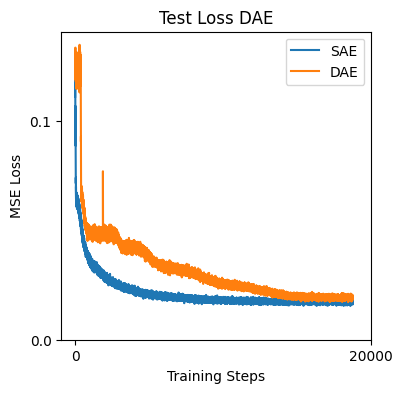

In [45]:
sae_train_loss_all = np.load(save_path + 'SAE/' + 'all_train_losses.npy')
dae_train_loss_all = np.load(save_path + 'DAE/' + 'all_train_losses.npy')

plt.figure(figsize=(4, 4))
plt.plot(np.concatenate(sae_train_loss_all), label='SAE')
plt.plot(np.concatenate(dae_train_loss_all), label='DAE')
plt.legend()
plt.xticks([0, 20000])
plt.yticks([0, 0.1])
plt.xlabel('Training Steps')
plt.ylabel('MSE Loss')
plt.title('Test Loss DAE')